In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tools.eval_measures as em
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style("darkgrid")
sns.set_context("poster", font_scale = .8, rc={"grid.linewidth": 0.6})

In [3]:
from pylab import rcParams
rcParams['figure.figsize']=15,8
plt.rcParams.update({'font.size': 18})

# QUESTION1. Read the data as an appropriate Time Series data and plot the data.

In [4]:
df=pd.read_csv('Shoesales (1) (2).csv',parse_dates=True,index_col='YearMonth')
print('\n')
print('First 12 observations of the Data set on SoftDrinkProduction')
display(df.head(12))
print('\n')
print('Last 14 observations of the Data set on SoftDrinkProduction','\n')
display(df.tail(14))



First 12 observations of the Data set on SoftDrinkProduction


Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91
1980-06-01          95
1980-07-01          96
1980-08-01         128
1980-09-01         124
1980-10-01         111
1980-11-01         178
1980-12-01         140



Last 14 observations of the Data set on SoftDrinkProduction 



Shoe_Sales
YearMonth             
1994-06-01         227
1994-07-01         225
1994-08-01         205
1994-09-01         259
1994-10-01         254
1994-11-01         275
1994-12-01         394
1995-01-01         159
1995-02-01         230
1995-03-01         188
1995-04-01         195
1995-05-01         189
1995-06-01         220
1995-07-01         274

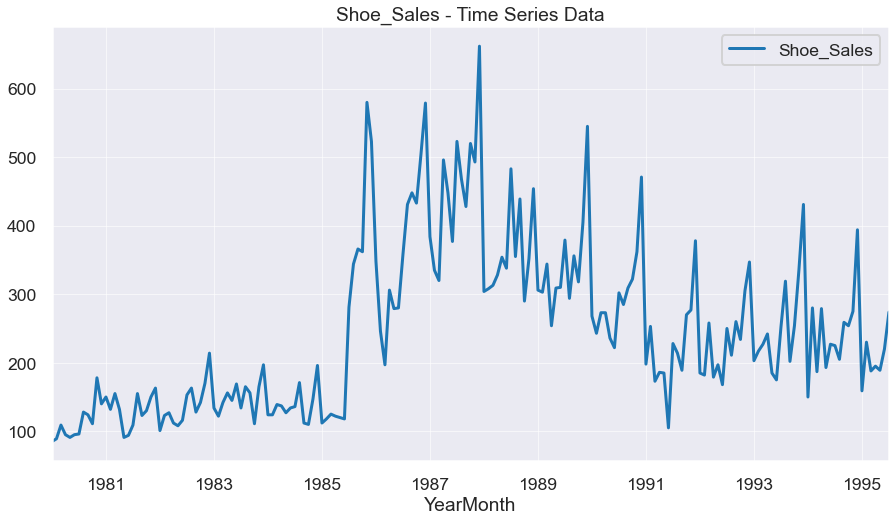

In [5]:
df.plot(grid=True);
plt.title('Shoe_Sales - Time Series Data');

# QUESTION2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.
#### 5

In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


None

In [7]:
display(df.dtypes)

Shoe_Sales    int64
dtype: object

In [8]:
display(df.isnull().sum())

Shoe_Sales    0
dtype: int64

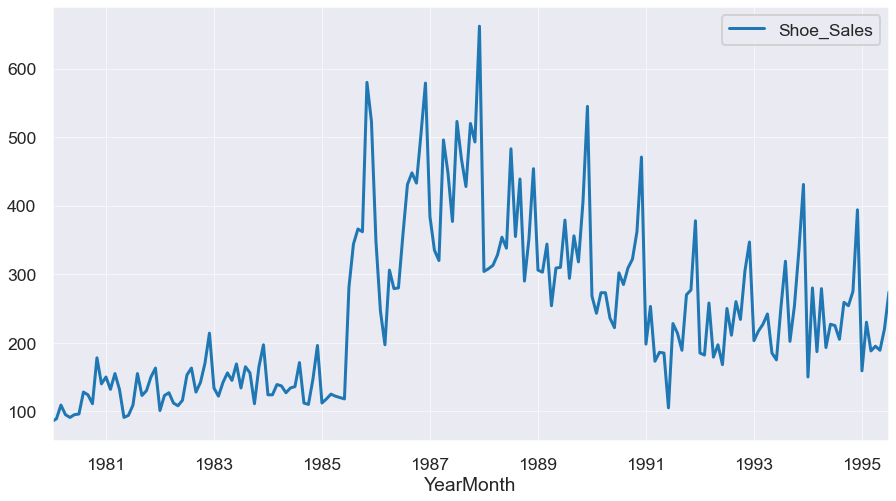

In [10]:
df.plot(grid=True);

In [11]:
display(df.describe().T.round(2))

count    mean     std   min    25%    50%    75%    max
Shoe_Sales  187.0  245.64  121.39  85.0  143.5  220.0  315.5  662.0

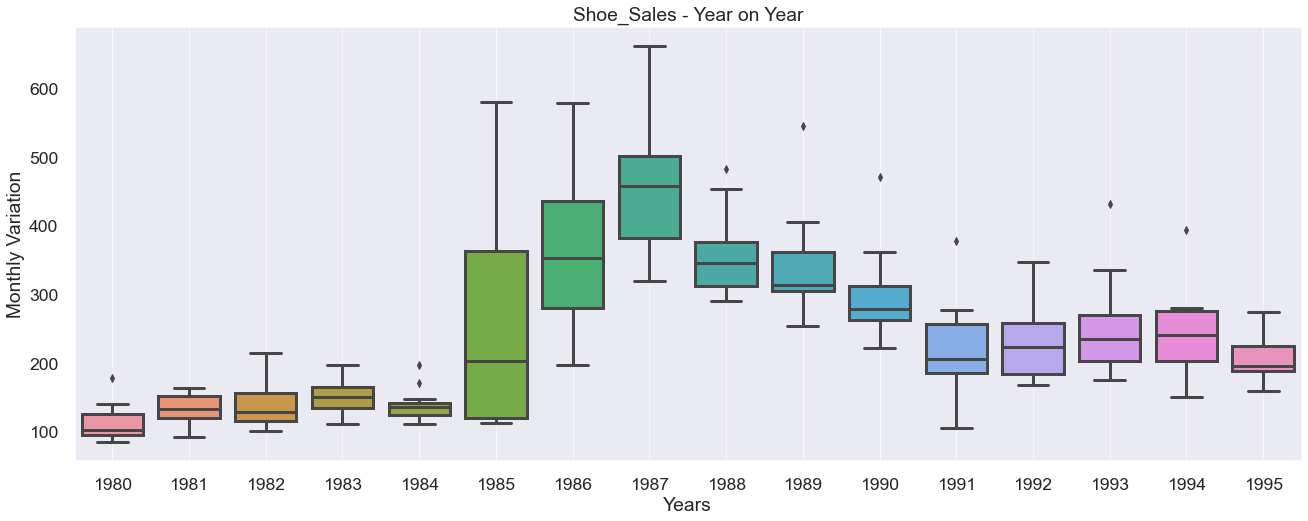

In [12]:
#### Plot Box plot for year on year Wine Sales
df_series=pd.read_csv('Shoesales (1) (2).csv',parse_dates=True,index_col='YearMonth',squeeze=True)
fig , ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_series.index.year,df_series,ax=ax); 
plt.grid();
plt.title('Shoe_Sales - Year on Year')
plt.xlabel('Years');
plt.ylabel('Monthly Variation');


### Monthly Sales for all the years

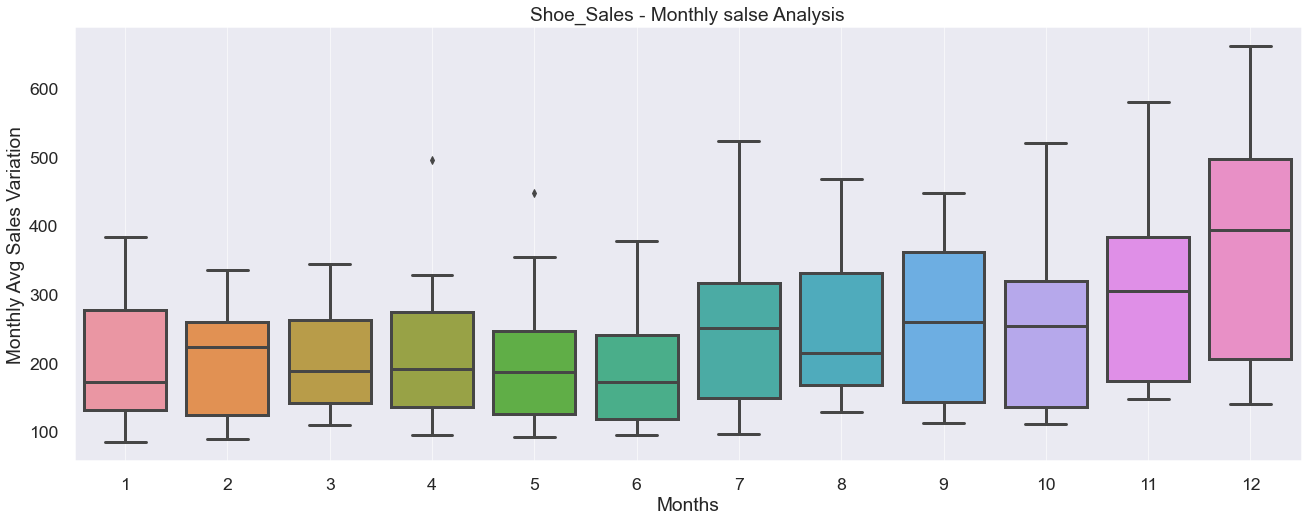

In [13]:
fig , ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_series.index.month,df_series,ax=ax); # rose_series is a series and not a dataframe
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Avg Sales Variation');
plt.title('Shoe_Sales - Monthly salse Analysis');



### Month Plot for Wine Sales

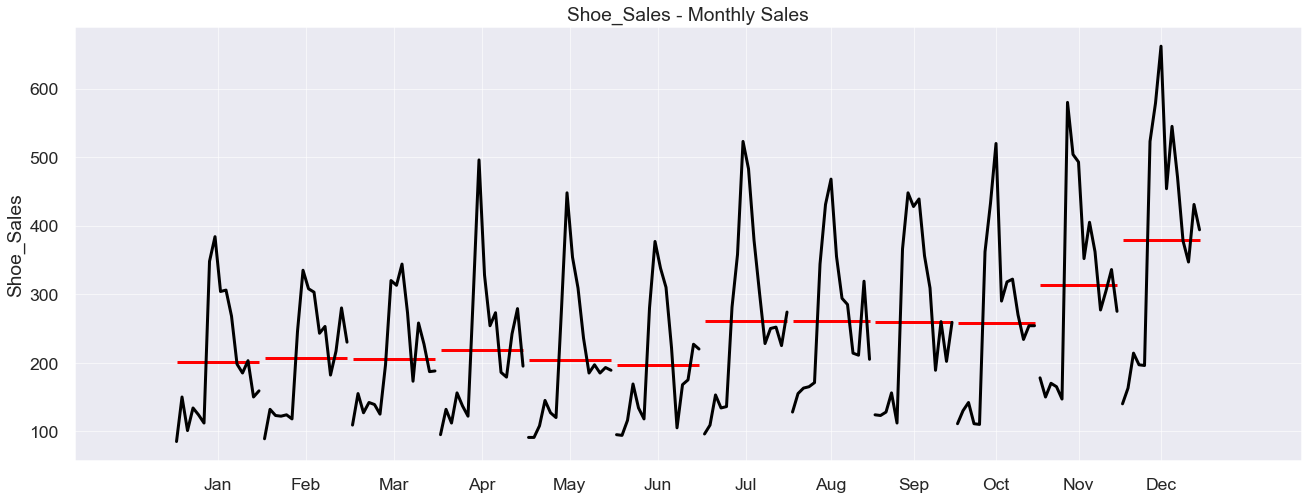

In [14]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax= plt.subplots(figsize=(22,8))
month_plot(df_series,ylabel='Shoe_Sales',ax=ax);

plt.title("Shoe_Sales - Monthly Sales");

### Monthly Sales Year wise

In [15]:
df_yearly_sales_across_months=pd.pivot_table(data=df,
                                          index=df.index.year,
                                          columns=df.index.month,
                                          values='Shoe_Sales',
                                              aggfunc='mean')
print('\n')
print('Shoe_Sales - Year on Year monthly sales','\n')
display(round(df_yearly_sales_across_months,0))



Shoe_Sales - Year on Year monthly sales 



YearMonth     1      2      3      4      5      6      7      8      9   \
YearMonth                                                                  
1980        85.0   89.0  109.0   95.0   91.0   95.0   96.0  128.0  124.0   
1981       150.0  132.0  155.0  132.0   91.0   94.0  109.0  155.0  123.0   
1982       101.0  123.0  127.0  112.0  108.0  116.0  153.0  163.0  128.0   
1983       134.0  122.0  142.0  156.0  145.0  169.0  134.0  165.0  156.0   
1984       124.0  124.0  139.0  137.0  127.0  134.0  136.0  171.0  112.0   
1985       112.0  118.0  125.0  122.0  120.0  118.0  281.0  344.0  366.0   
1986       348.0  246.0  197.0  306.0  279.0  280.0  358.0  431.0  448.0   
1987       384.0  335.0  320.0  496.0  448.0  377.0  523.0  468.0  428.0   
1988       304.0  308.0  313.0  328.0  354.0  338.0  483.0  355.0  439.0   
1989       306.0  303.0  344.0  254.0  309.0  310.0  379.0  294.0  356.0   
1990       268.0  243.0  273.0  273.0  236.0  222.0  302.0  285.0  309.0   
1991       198.0  253.0  173.0  186.0  185.0  105.0  228.0  214.0  189.0   
1992       185.0  182.0  258.0  179.0  197.0  168.0  250.0  211.0  260.0   
1993       203.0  217.0  227.0  242.0  185.0  175.0  252.0  319.0  202.0   
1994       150.0  280.0  187.0  279.0  193.0  227.0  225.0  205.0  259.0   
1995       159.0  230.0  188.0  195.0  189.0  220.0  274.0    NaN    NaN   

YearMonth     10     11     12  
YearMonth                       
1980       111.0  178.0  140.0  
1981       130.0  150.0  163.0  
1982       142.0  170.0  214.0  
1983       111.0  165.0  197.0  
1984       110.0  147.0  196.0  
1985       362.0  580.0  523.0  
1986       433.0  504.0  579.0  
1987       520.0  493.0  662.0  
1988       290.0  352.0  454.0  
1989       318.0  405.0  545.0  
1990       322.0  362.0  471.0  
1991       270.0  277.0  378.0  
1992       234.0  305.0  347.0  
1993       254.0  336.0  431.0  
1994       254.0  275.0  394.0  
1995         NaN    NaN    NaN

In [129]:
df_yearly_sales_across_months=pd.pivot_table(data=df,
#                                          index=df.index.year,
                                          columns=df.index.month,
                                          values='Shoe_Sales',
                                              aggfunc='mean')
print('\n')
print('Shoe_Sales - average monthly sales','\n')
display(round(df_yearly_sales_across_months,0))



Shoe_Sales - average monthly sales 



YearMonth      1      2      3      4      5      6      7      8      9   \
Shoe_Sales  201.0  207.0  205.0  218.0  204.0  197.0  261.0  261.0  260.0   

YearMonth      10     11     12  
Shoe_Sales  257.0  313.0  380.0

In [17]:
df_yearly_sales_across_months=pd.pivot_table(data=df,
                                          index=df.index.year,
                                          columns=df.index.month,
                                          values='Shoe_Sales',
                                          aggfunc='mean')
                                                
                                                   
print('\n')
print('Shoe_Sales - Year on Year monthly sales','\n')
display(round(df_yearly_sales_across_months,0))



Shoe_Sales - Year on Year monthly sales 



YearMonth     1      2      3      4      5      6      7      8      9   \
YearMonth                                                                  
1980        85.0   89.0  109.0   95.0   91.0   95.0   96.0  128.0  124.0   
1981       150.0  132.0  155.0  132.0   91.0   94.0  109.0  155.0  123.0   
1982       101.0  123.0  127.0  112.0  108.0  116.0  153.0  163.0  128.0   
1983       134.0  122.0  142.0  156.0  145.0  169.0  134.0  165.0  156.0   
1984       124.0  124.0  139.0  137.0  127.0  134.0  136.0  171.0  112.0   
1985       112.0  118.0  125.0  122.0  120.0  118.0  281.0  344.0  366.0   
1986       348.0  246.0  197.0  306.0  279.0  280.0  358.0  431.0  448.0   
1987       384.0  335.0  320.0  496.0  448.0  377.0  523.0  468.0  428.0   
1988       304.0  308.0  313.0  328.0  354.0  338.0  483.0  355.0  439.0   
1989       306.0  303.0  344.0  254.0  309.0  310.0  379.0  294.0  356.0   
1990       268.0  243.0  273.0  273.0  236.0  222.0  302.0  285.0  309.0   
1991       198.0  253.0  173.0  186.0  185.0  105.0  228.0  214.0  189.0   
1992       185.0  182.0  258.0  179.0  197.0  168.0  250.0  211.0  260.0   
1993       203.0  217.0  227.0  242.0  185.0  175.0  252.0  319.0  202.0   
1994       150.0  280.0  187.0  279.0  193.0  227.0  225.0  205.0  259.0   
1995       159.0  230.0  188.0  195.0  189.0  220.0  274.0    NaN    NaN   

YearMonth     10     11     12  
YearMonth                       
1980       111.0  178.0  140.0  
1981       130.0  150.0  163.0  
1982       142.0  170.0  214.0  
1983       111.0  165.0  197.0  
1984       110.0  147.0  196.0  
1985       362.0  580.0  523.0  
1986       433.0  504.0  579.0  
1987       520.0  493.0  662.0  
1988       290.0  352.0  454.0  
1989       318.0  405.0  545.0  
1990       322.0  362.0  471.0  
1991       270.0  277.0  378.0  
1992       234.0  305.0  347.0  
1993       254.0  336.0  431.0  
1994       254.0  275.0  394.0  
1995         NaN    NaN    NaN

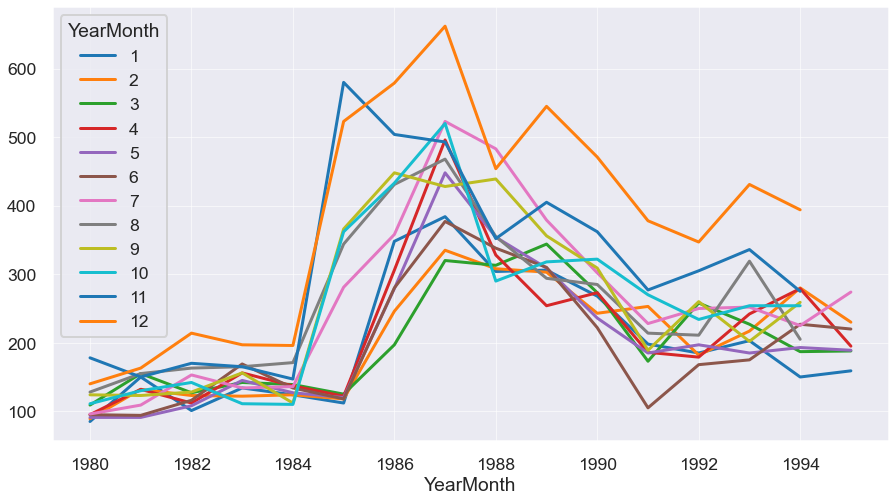

In [18]:
df_yearly_sales_across_months.plot();

### Read the data year wise - sum of all monthly sales

Shoe_Sales
YearMonth             
1980-12-31        1341
1981-12-31        1584
1982-12-31        1657
1983-12-31        1796
1984-12-31        1657
1985-12-31        3171
1986-12-31        4409
1987-12-31        5454
1988-12-31        4318
1989-12-31        4123
1990-12-31        3566
1991-12-31        2656
1992-12-31        2776
1993-12-31        3043
1994-12-31        2928
1995-12-31        1455

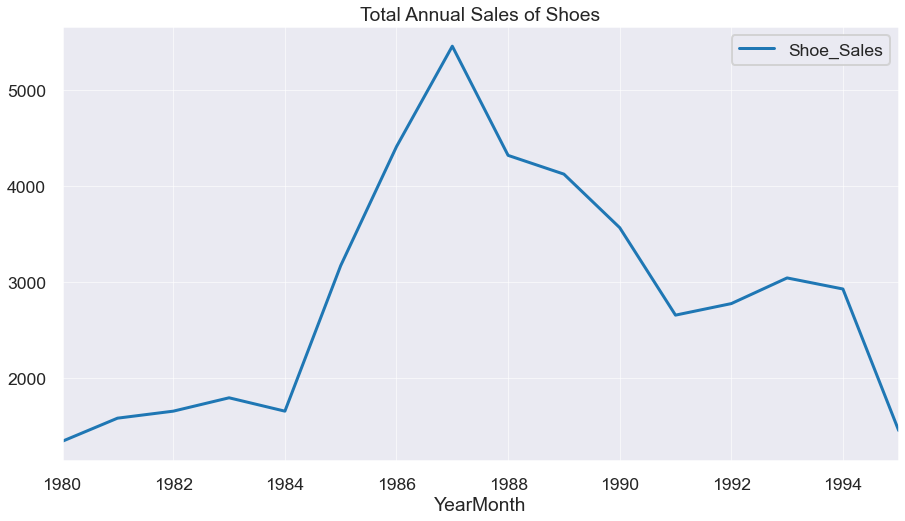

In [19]:
df_yearly_sum=df.resample('A').sum()
display(df_yearly_sum)
df_yearly_sum.plot();
plt.title('Total Annual Sales of Shoes');

In [130]:
df_yearly_sum.T

YearMonth   1980-12-31  1981-12-31  1982-12-31  1983-12-31  1984-12-31  \
Shoe_Sales      111.75       132.0  138.083333  149.666667  138.083333   

YearMonth   1985-12-31  1986-12-31  1987-12-31  1988-12-31  1989-12-31  \
Shoe_Sales      264.25  367.416667       454.5  359.833333  343.583333   

YearMonth   1990-12-31  1991-12-31  1992-12-31  1993-12-31  1994-12-31  \
Shoe_Sales  297.166667  221.333333  231.333333  253.583333       244.0   

YearMonth   1995-12-31  
Shoe_Sales  207.857143

### Read the data year wise - mean of all monthly sales

Shoe_Sales
YearMonth             
1980-12-31       112.0
1981-12-31       132.0
1982-12-31       138.0
1983-12-31       150.0
1984-12-31       138.0
1985-12-31       264.0
1986-12-31       367.0
1987-12-31       454.0
1988-12-31       360.0
1989-12-31       344.0
1990-12-31       297.0
1991-12-31       221.0
1992-12-31       231.0
1993-12-31       254.0
1994-12-31       244.0
1995-12-31       208.0

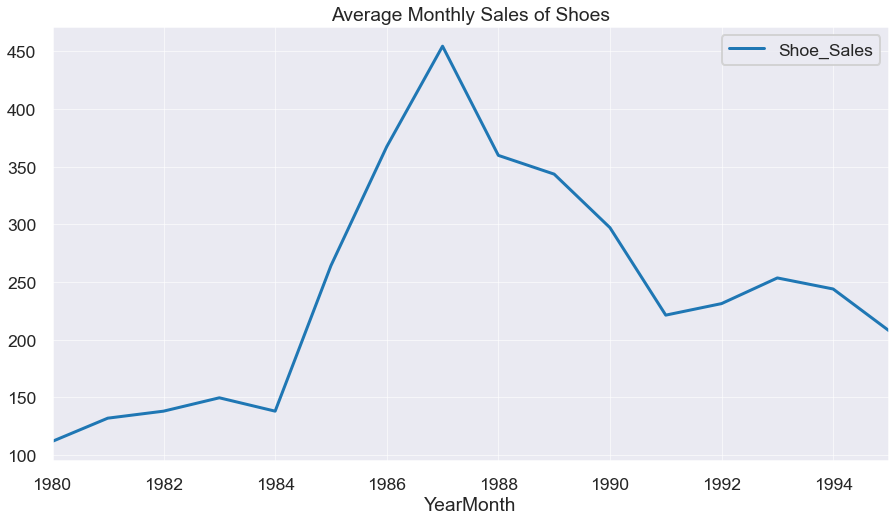

In [131]:
df_yearly_mean=df.resample('A').mean()
display(round(df_yearly_mean,0))
df_yearly_mean.plot();
plt.title('Average Monthly Sales of Shoes');

<AxesSubplot:xlabel='YearMonth'>

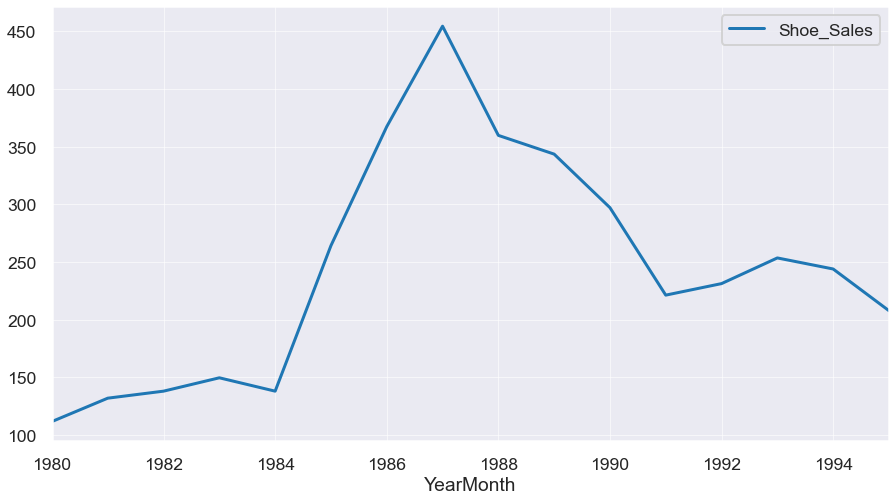

In [21]:
df_yearly_sum.plot()

In [132]:
df_yearly_mean.T

YearMonth   1980-12-31  1981-12-31  1982-12-31  1983-12-31  1984-12-31  \
Shoe_Sales      111.75       132.0  138.083333  149.666667  138.083333   

YearMonth   1985-12-31  1986-12-31  1987-12-31  1988-12-31  1989-12-31  \
Shoe_Sales      264.25  367.416667       454.5  359.833333  343.583333   

YearMonth   1990-12-31  1991-12-31  1992-12-31  1993-12-31  1994-12-31  \
Shoe_Sales  297.166667  221.333333  231.333333  253.583333       244.0   

YearMonth   1995-12-31  
Shoe_Sales  207.857143

### Decompose the data

### ADDITIVE MODEL

'Shoe_Sales -Decomposition of Production Data - Additive Model'

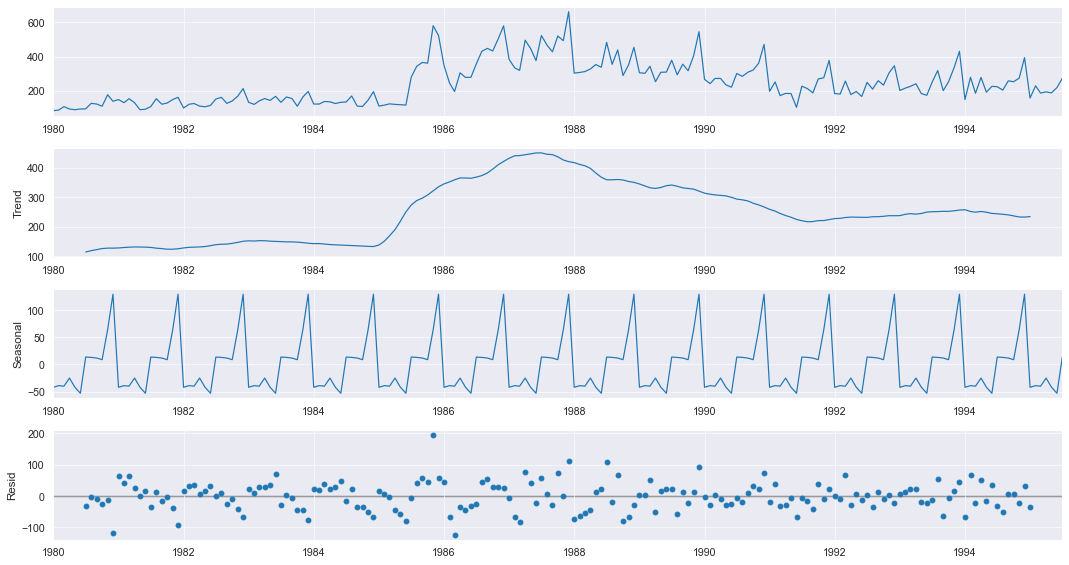

In [22]:
sns.set_context("paper", font_scale = 1.2, rc={"grid.linewidth": 0.6})
df_additive_decomposition=seasonal_decompose(df,model='additive')
df_additive_decomposition.plot();
display('Shoe_Sales -Decomposition of Production Data - Additive Model')

#### MULTIPLICATIVE Model

'Shoe_Sales -Decomposition of Production Data - Multiplicative Model'

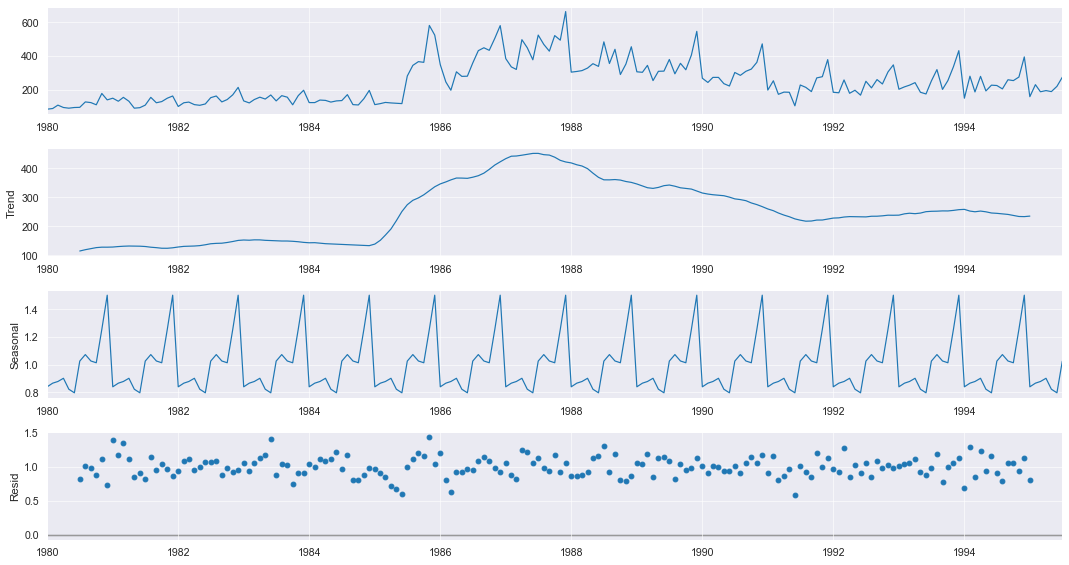

In [23]:
df_additive_decomposition=seasonal_decompose(df,model='mult')
df_additive_decomposition.plot();
display('Shoe_Sales -Decomposition of Production Data - Multiplicative Model')    

# QUESTION3. Split the data into training and test. The test data should start in 1991.
#### 2

In [24]:
df_train=df[df.index<'1991']
df_test=df[df.index>='1991']  

In [25]:
print('First 12 observations of Shoe_Sales Production Train Data')
display(df_train.head(12))
print('Last 12 observations of Shoe_Sales Production Train Data')
display(df_train.tail(12)) 
print('Nummber of Observations in Train Set:', df_train.shape[0])

First 12 observations of Shoe_Sales Production Train Data


Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91
1980-06-01          95
1980-07-01          96
1980-08-01         128
1980-09-01         124
1980-10-01         111
1980-11-01         178
1980-12-01         140

Last 12 observations of Shoe_Sales Production Train Data


Shoe_Sales
YearMonth             
1990-01-01         268
1990-02-01         243
1990-03-01         273
1990-04-01         273
1990-05-01         236
1990-06-01         222
1990-07-01         302
1990-08-01         285
1990-09-01         309
1990-10-01         322
1990-11-01         362
1990-12-01         471

Nummber of Observations in Train Set: 132


In [26]:
print('First 12 observations of Shoe_Sales Test Data')
display(df_test.head(12))
print('Last 12 observations of Shoe_Sales Test Data')
display(round(df_test.tail(12),0)) 
print('Nummber of Observations in Test Set:', df_test.shape[0])

First 12 observations of Shoe_Sales Test Data


Shoe_Sales
YearMonth             
1991-01-01         198
1991-02-01         253
1991-03-01         173
1991-04-01         186
1991-05-01         185
1991-06-01         105
1991-07-01         228
1991-08-01         214
1991-09-01         189
1991-10-01         270
1991-11-01         277
1991-12-01         378

Last 12 observations of Shoe_Sales Test Data


Shoe_Sales
YearMonth             
1994-08-01         205
1994-09-01         259
1994-10-01         254
1994-11-01         275
1994-12-01         394
1995-01-01         159
1995-02-01         230
1995-03-01         188
1995-04-01         195
1995-05-01         189
1995-06-01         220
1995-07-01         274

Nummber of Observations in Test Set: 55


### Plot the Train and Test Data

In [27]:
sns.set_context("poster", font_scale = .8, rc={"grid.linewidth": 0.6})

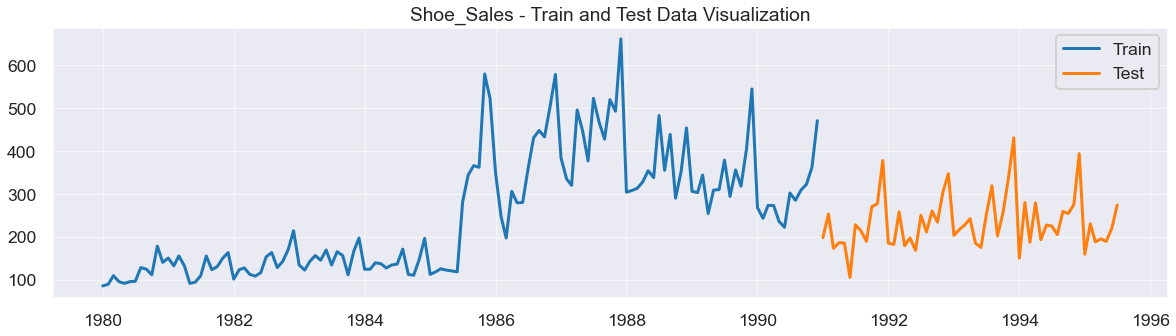

In [28]:
plt.figure(figsize=(20,5))
plt.plot(df_train,label='Train');
plt.plot(df_test,label='Test');
plt.legend()
plt.title('Shoe_Sales - Train and Test Data Visualization');  

# QUESTION4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.
#### 16

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
# define function for Mean Average Percent Error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100


df Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132] 

df Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187] 



YearMonth
1991-01-01    421.658686
1991-02-01    424.231362
1991-03-01    426.804037
1991-04-01    429.376713
1991-05-01    431.949389
Name: RegOnTime, dtype: float64

Shoe_Sales_TEST RMSE  Shoe_Sales_MAPE
Linear Regression Model               266.276          123.124

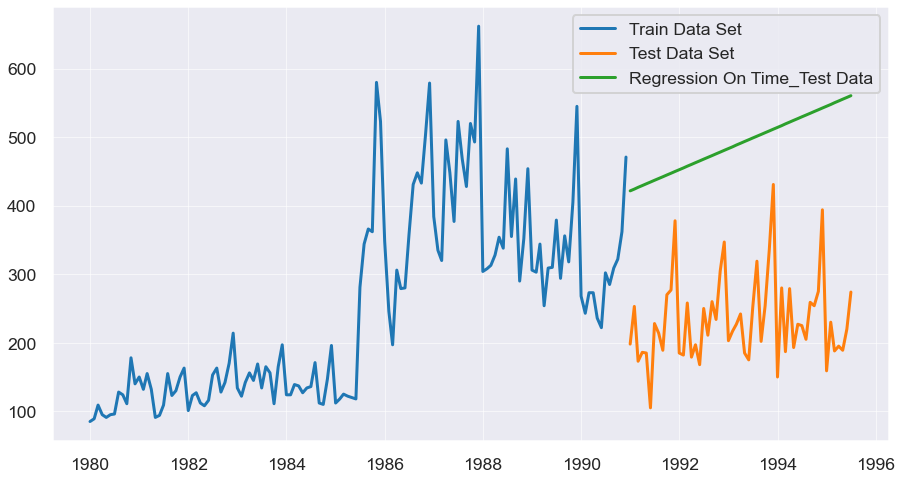

In [32]:
df_train_time = [i+1 for i in range(len(df_train))]
df_test_time = [i+133 for i in range(len(df_test))]
print('df Training Time instance','\n',df_train_time,'\n')
print('df Test Time instance','\n',df_test_time,'\n')

LinearRegression_train_df = df_train.copy()
LinearRegression_test_df = df_test.copy()
LinearRegression_train_df['time']=df_train_time
LinearRegression_test_df['time']=df_test_time

lr.fit(LinearRegression_train_df[['time']],
       LinearRegression_train_df['Shoe_Sales'])

test_predictions_model1         = lr.predict(LinearRegression_test_df[['time']])
LinearRegression_test_df['RegOnTime'] = test_predictions_model1
display(LinearRegression_test_df['RegOnTime'].head())

plt.plot(df_train,label='Train Data Set');
plt.plot(df_test,label='Test Data Set');
plt.plot(LinearRegression_test_df['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
a=np.asarray(df_test['Shoe_Sales'])
b=np.asarray(LinearRegression_test_df['RegOnTime'])
MAPE=mean_absolute_percentage_error(a,b)
RMSE=mean_squared_error(a,b,squared=False)
RMSE_LinearRegression_Reg_df =pd.DataFrame({'Shoe_Sales_TEST RMSE':round(RMSE,3),
                                   'Shoe_Sales_MAPE':round(MAPE,3)},
                                  index=['Linear Regression Model'])
RMSE_LinearRegression_Reg_df


## Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡 ¶

YearMonth
1991-01-01    471
1991-02-01    471
1991-03-01    471
1991-04-01    471
1991-05-01    471
Name: naive, dtype: int64

Shoe_Sales_TEST RMSE  Shoe_Sales_MAPE
Naive Regression Model               245.121           114.87

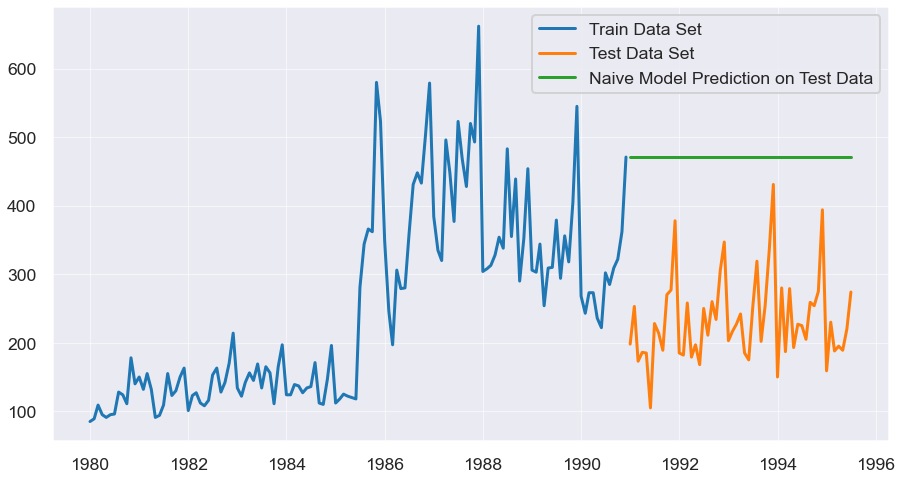

In [33]:
NaiveModel_train = df_train.copy()
NaiveModel_test = df_test.copy()
NaiveModel_test['naive'] = np.asarray(df_train['Shoe_Sales'])[len(np.asarray(df_train['Shoe_Sales']))-1]
display(NaiveModel_test['naive'].head())
plt.plot(df_train,label='Train Data Set');
plt.plot(df_test,label='Test Data Set');
plt.plot(NaiveModel_test['naive'], label='Naive Model Prediction on Test Data')

plt.legend(loc='best')
b=np.asarray(NaiveModel_test[['naive']])
MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_Naive_Reg_df=pd.DataFrame({'Shoe_Sales_TEST RMSE':RMSE,
                                   'Shoe_Sales_MAPE':MAPE},
                                  index=['Naive Regression Model'])
RMSE_Naive_Reg_df  


In [34]:
Result=pd.concat([RMSE_LinearRegression_Reg_df,RMSE_Naive_Reg_df])
Result

Shoe_Sales_TEST RMSE  Shoe_Sales_MAPE
Linear Regression Model               266.276          123.124
Naive Regression Model                245.121          114.870

###  Simple Average Method

Shoe_Sales  mean_forecast
YearMonth                            
1991-01-01         198     250.575758
1991-02-01         253     250.575758
1991-03-01         173     250.575758
1991-04-01         186     250.575758
1991-05-01         185     250.575758

Shoe_Sales_TEST RMSE  Shoe_Sales_MAPE
SIMPLE AVG Model                63.985           24.251

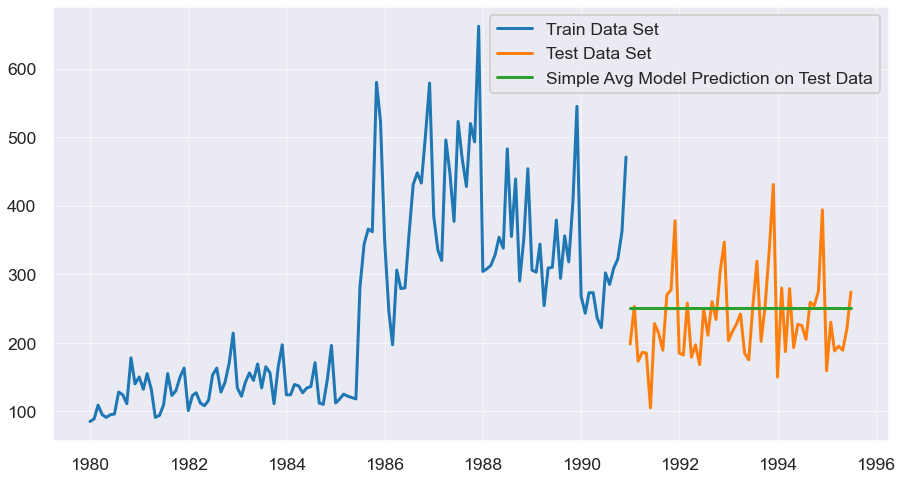

In [35]:
SimpleAvgModel_train = df_train.copy()
SimpleAvgModel_test = df_test.copy()
SimpleAvgModel_test['mean_forecast'] = df_train['Shoe_Sales'].mean()
display(SimpleAvgModel_test.head())

plt.plot(df_train,label='Train Data Set');
plt.plot(df_test,label='Test Data Set');
plt.plot(SimpleAvgModel_test['mean_forecast'], label='Simple Avg Model Prediction on Test Data')
plt.legend(loc='best')

b=np.asarray(SimpleAvgModel_test['mean_forecast'])

MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_SimpleAvg_Reg_df =pd.DataFrame({'Shoe_Sales_TEST RMSE':RMSE,
                                   'Shoe_Sales_MAPE':MAPE},
                                  index=['SIMPLE AVG Model'])
RMSE_SimpleAvg_Reg_df


In [36]:
Result=pd.concat([Result,RMSE_SimpleAvg_Reg_df])
Result

Shoe_Sales_TEST RMSE  Shoe_Sales_MAPE
Linear Regression Model               266.276          123.124
Naive Regression Model                245.121          114.870
SIMPLE AVG Model                       63.985           24.251

### Moving Average Method

In [37]:
MovingAvg=df.copy()

In [38]:
MovingAvg['Trailing_2'] = MovingAvg['Shoe_Sales'].rolling(2).mean()
MovingAvg['Trailing_4'] = MovingAvg['Shoe_Sales'].rolling(4).mean()
MovingAvg['Trailing_6'] = MovingAvg['Shoe_Sales'].rolling(6).mean()
MovingAvg['Trailing_9'] = MovingAvg['Shoe_Sales'].rolling(9).mean()

MovingAvg.head() 

Shoe_Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                             
1980-01-01          85         NaN         NaN         NaN         NaN
1980-02-01          89        87.0         NaN         NaN         NaN
1980-03-01         109        99.0         NaN         NaN         NaN
1980-04-01          95       102.0        94.5         NaN         NaN
1980-05-01          91        93.0        96.0         NaN         NaN

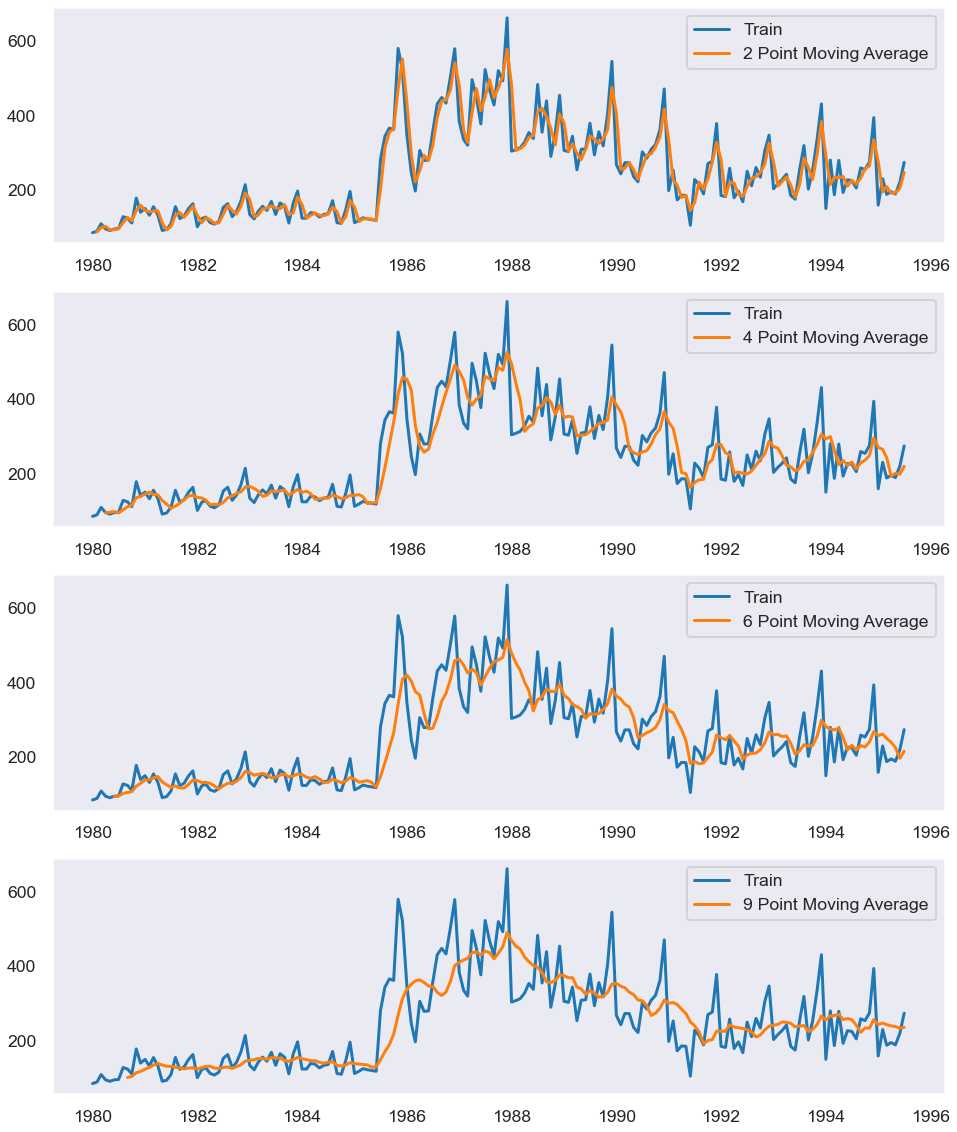

In [39]:
## Plotting on the whole data

plt.figure(figsize=(16,20))
plt.subplot(4,1,1)

plt.plot(MovingAvg['Shoe_Sales'], label='Train')
plt.plot(MovingAvg['Trailing_2'], label='2 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,2)
plt.plot(MovingAvg['Shoe_Sales'], label='Train')
plt.plot(MovingAvg['Trailing_4'], label='4 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,3)
plt.plot(MovingAvg['Shoe_Sales'], label='Train')
plt.plot(MovingAvg['Trailing_6'], label='6 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,4)
plt.plot(MovingAvg['Shoe_Sales'], label='Train')
plt.plot(MovingAvg['Trailing_9'], label='9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();



In [40]:
trailing_MovingAverage_train=MovingAvg[0:132] 
trailing_MovingAverage_test=MovingAvg[132:]

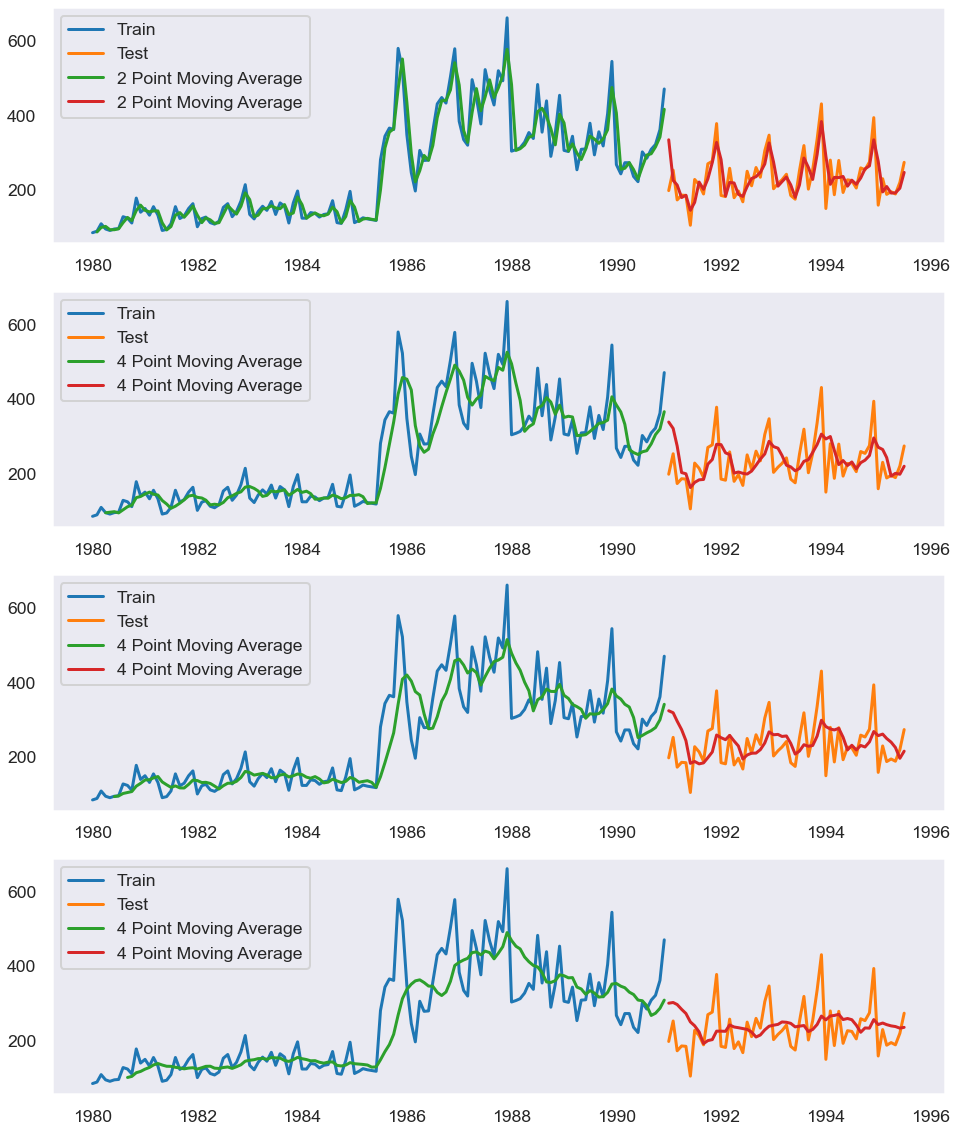

In [41]:
## Plotting on Test a nd Train data

plt.figure(figsize=(16,20))
plt.subplot(4,1,1)

plt.plot(df_train['Shoe_Sales'], label='Train')
plt.plot(df_test['Shoe_Sales'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Moving Average')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,2)
plt.plot(df_train['Shoe_Sales'], label='Train')
plt.plot(df_test['Shoe_Sales'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Moving Average')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,3)
plt.plot(df_train['Shoe_Sales'], label='Train')
plt.plot(df_test['Shoe_Sales'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_6'], label='4 Point Moving Average')
plt.plot(trailing_MovingAverage_test['Trailing_6'], label='4 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,4)
plt.plot(df_train['Shoe_Sales'], label='Train')
plt.plot(df_test['Shoe_Sales'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_9'], label='4 Point Moving Average')
plt.plot(trailing_MovingAverage_test['Trailing_9'], label='4 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();


MAPE=mean_absolute_percentage_error(df_test.values, trailing_MovingAverage_test['Trailing_2'].values)
RMSE_MovingAvg_2Pt_df =pd.DataFrame({'df_TEST RMSE':round(mean_squared_error(df_test.values, trailing_MovingAverage_test['Trailing_2'].values,squared=False),3),
                                   'df_MAPE':MAPE},
                                  index=['MOVING AVG - 2 Point Model'])

MAPE=mean_absolute_percentage_error(df_test.values, trailing_MovingAverage_test['Trailing_4'].values)
RMSE_MovingAvg_4Pt_df =pd.DataFrame({'df_TEST RMSE':round(mean_squared_error(df_test.values, trailing_MovingAverage_test['Trailing_4'].values,squared=False),3),
                                   'df_MAPE':MAPE},
                                  index=['MOVING AVG - 4 Point Model'])

MAPE=mean_absolute_percentage_error(df_test.values, trailing_MovingAverage_test['Trailing_6'].values)
RMSE_MovingAvg_6Pt_df =pd.DataFrame({'df_TEST RMSE':round(mean_squared_error(df_test.values, trailing_MovingAverage_test['Trailing_6'].values,squared=False),3),
                                   'df_MAPE':MAPE},
                                  index=['MOVING AVG - 6 Point Model'])

MAPE=mean_absolute_percentage_error(df_test.values, trailing_MovingAverage_test['Trailing_9'].values)
RMSE_MovingAvg_9Pt_df =pd.DataFrame({'df_TEST RMSE':round(mean_squared_error(df_test.values, trailing_MovingAverage_test['Trailing_9'].values,squared=False),3),
                                   'df_MAPE':MAPE},
                                  index=['MOVING AVG - 9 Point Model'])
Results_df = pd.concat([Results_df,RMSE_MovingAvg_2Pt_df,
                        df_MovingAvg_4Pt_ROSE,RMSE_MovingAvg_6Pt_df,RMSE_MovingAvg_9Pt_df])
Results_df                         


### Simple Exponential Model

In [42]:
df_test['Shoe_Sales']

YearMonth
1991-01-01    198
1991-02-01    253
1991-03-01    173
1991-04-01    186
1991-05-01    185
1991-06-01    105
1991-07-01    228
1991-08-01    214
1991-09-01    189
1991-10-01    270
1991-11-01    277
1991-12-01    378
1992-01-01    185
1992-02-01    182
1992-03-01    258
1992-04-01    179
1992-05-01    197
1992-06-01    168
1992-07-01    250
1992-08-01    211
1992-09-01    260
1992-10-01    234
1992-11-01    305
1992-12-01    347
1993-01-01    203
1993-02-01    217
1993-03-01    227
1993-04-01    242
1993-05-01    185
1993-06-01    175
1993-07-01    252
1993-08-01    319
1993-09-01    202
1993-10-01    254
1993-11-01    336
1993-12-01    431
1994-01-01    150
1994-02-01    280
1994-03-01    187
1994-04-01    279
1994-05-01    193
1994-06-01    227
1994-07-01    225
1994-08-01    205
1994-09-01    259
1994-10-01    254
1994-11-01    275
1994-12-01    394
1995-01-01    159
1995-02-01    230
1995-03-01    188
1995-04-01    195
1995-05-01    189
1995-06-01    220
1995-07-01    274




SES Model best parameters for Shoe_Sales


{'smoothing_level': 0.6050500032277196,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 88.82965549528882,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Predictions for test data of Shoe_Sales


1991-01-01    420.229977
1991-02-01    420.229977
1991-03-01    420.229977
1991-04-01    420.229977
1991-05-01    420.229977
Freq: MS, dtype: float64

Shoe_Sales_TEST RMSE  Shoe_Sales_MAPE
SES Model, Alpha=0.0987               196.405           91.799

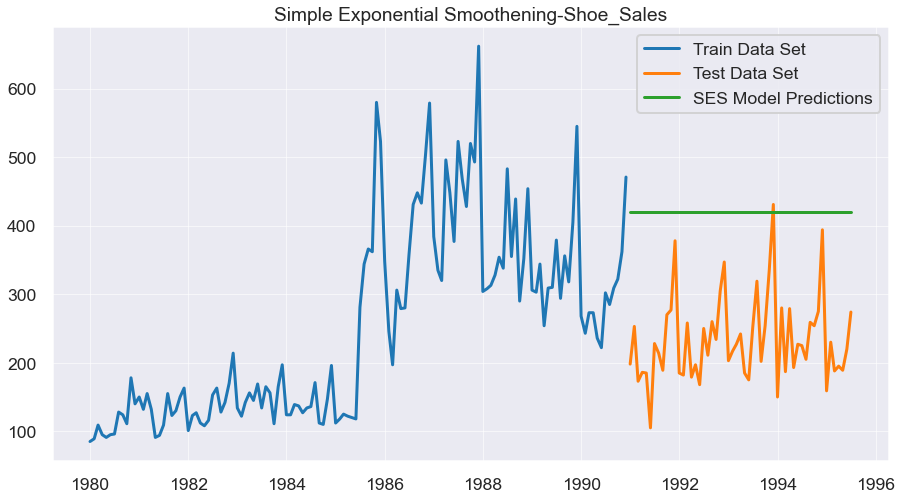

In [43]:
model_SES_df=SimpleExpSmoothing(df_train,initialization_method='estimated')
model_SES_df=model_SES_df.fit(optimized=True)
print('\n')
print('SES Model best parameters for Shoe_Sales')
display(model_SES_df.params)
SES_df_predict=model_SES_df.forecast(steps=len(df_test))
print('Predictions for test data of Shoe_Sales')
display(SES_df_predict.head())
print('\n')
plt.plot(df_train,label='Train Data Set');
plt.plot(df_test,label='Test Data Set');
plt.plot(SES_df_predict,label='SES Model Predictions');
plt.legend(loc='best');
plt.title('Simple Exponential Smoothening-Shoe_Sales');
a=np.asarray(df_test['Shoe_Sales'])
b=np.asarray(SES_df_predict)
MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_SES_df=pd.DataFrame({'Shoe_Sales_TEST RMSE':RMSE,
                           'Shoe_Sales_MAPE':MAPE},
                           index=['SES Model, Alpha=0.0987'])
RMSE_SES_df   


In [44]:
Result=pd.concat([Result,RMSE_SES_df])
Result

Shoe_Sales_TEST RMSE  Shoe_Sales_MAPE
Linear Regression Model               266.276          123.124
Naive Regression Model                245.121          114.870
SIMPLE AVG Model                       63.985           24.251
SES Model, Alpha=0.0987               196.405           91.799

### Double Exponentital Smoothening - Holt Model



DES Model best parameters for Shoe_Sales


{'smoothing_level': 0.5957893592032527,
 'smoothing_trend': 0.00027755145973862305,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 82.94928943036535,
 'initial_trend': 2.53794462416892,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Predictions for test data of Shoe_Sales


1991-01-01    423.037852
1991-02-01    425.576513
1991-03-01    428.115175
1991-04-01    430.653837
1991-05-01    433.192498
1991-06-01    435.731160
1991-07-01    438.269821
1991-08-01    440.808483
1991-09-01    443.347145
1991-10-01    445.885806
1991-11-01    448.424468
1991-12-01    450.963129
1992-01-01    453.501791
1992-02-01    456.040453
1992-03-01    458.579114
1992-04-01    461.117776
1992-05-01    463.656437
1992-06-01    466.195099
1992-07-01    468.733761
1992-08-01    471.272422
1992-09-01    473.811084
1992-10-01    476.349745
1992-11-01    478.888407
1992-12-01    481.427069
1993-01-01    483.965730
1993-02-01    486.504392
1993-03-01    489.043053
1993-04-01    491.581715
1993-05-01    494.120376
1993-06-01    496.659038
1993-07-01    499.197700
1993-08-01    501.736361
1993-09-01    504.275023
1993-10-01    506.813684
1993-11-01    509.352346
1993-12-01    511.891008
1994-01-01    514.429669
1994-02-01    516.968331
1994-03-01    519.506992
1994-04-01    522.045654


Shoe_Sales_TEST RMSE  Shoe_Sales_MAPE
DES Model,Alpha=1.91e-08,Beta=7.30e-09                266.66          123.346

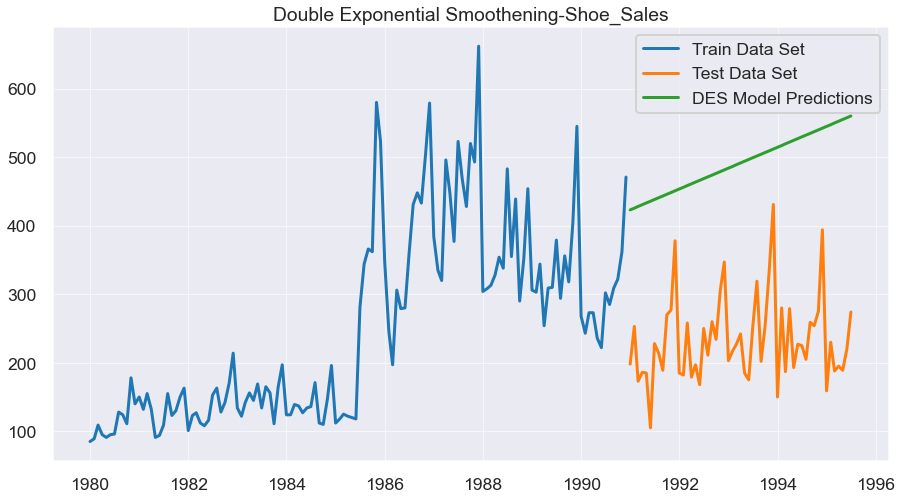

In [45]:
model_DES_df=Holt(df_train,initialization_method='estimated')
model_DES_df=model_DES_df.fit(optimized=True)
print('\n')
print('DES Model best parameters for Shoe_Sales')
display(model_DES_df.params)
DES_df_predict=model_DES_df.forecast(steps=len(df_test))
print('Predictions for test data of Shoe_Sales')
display(DES_df_predict)
print('\n')
plt.plot(df_train,label='Train Data Set');
plt.plot(df_test,label='Test Data Set');
plt.plot(DES_df_predict,label='DES Model Predictions');
plt.legend(loc='best');
plt.title('Double Exponential Smoothening-Shoe_Sales');
b=np.asarray(DES_df_predict)
MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_DES_df=pd.DataFrame({'Shoe_Sales_TEST RMSE':RMSE,
                           'Shoe_Sales_MAPE':MAPE},
                           index=['DES Model,Alpha=1.91e-08,Beta=7.30e-09'])
RMSE_DES_df  


In [46]:
Result=pd.concat([Result,RMSE_DES_df])
Result

Shoe_Sales_TEST RMSE  Shoe_Sales_MAPE
Linear Regression Model                              266.276          123.124
Naive Regression Model                               245.121          114.870
SIMPLE AVG Model                                      63.985           24.251
SES Model, Alpha=0.0987                              196.405           91.799
DES Model,Alpha=1.91e-08,Beta=7.30e-09               266.660          123.346

### Holt Winters Model ( with sesonality and trend ,additive)



TES_ADD Model best parameters for Shoe_Sales


{'smoothing_level': 0.5707142857142857,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.29372180451127816,
 'damping_trend': nan,
 'initial_level': 116.47499999999991,
 'initial_trend': 1.6939393939394,
 'initial_seasons': array([-11.20138889, -14.06597222,   1.11111111,  -5.25347222,
        -21.42013889, -11.18055556, -10.83680556,  18.14236111,
         -2.53472222, -12.53472222,  28.90277778,  40.87152778]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Predictions for test data of Shoe_Sales


1991-01-01    219.083658
1991-02-01    213.816321
1991-03-01    246.658224
1991-04-01    267.260236
1991-05-01    287.719744
Freq: MS, dtype: float64

Shoe_Sales_TEST RMSE  \
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...               128.993   

                                                    Shoe_Sales_MAPE  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...           54.949

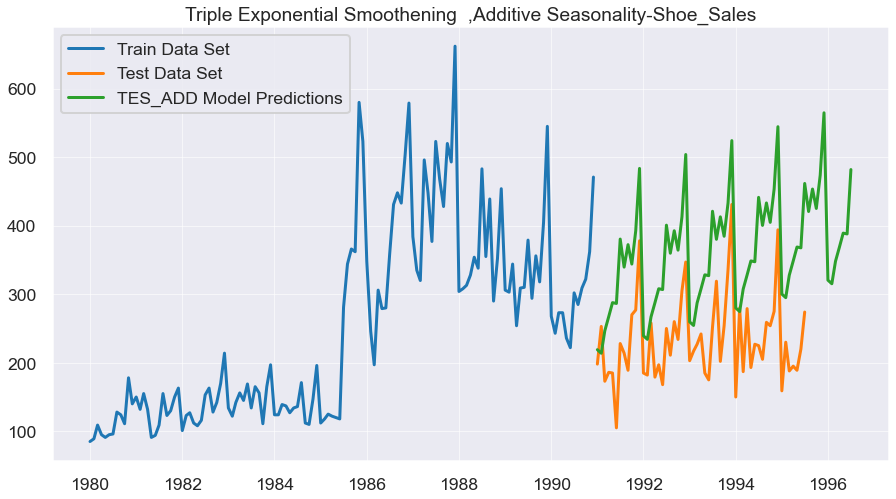

In [47]:
model_TES_ADD_df=ExponentialSmoothing(df_train,initialization_method='estimated',seasonal='add',trend='add')
model_TES_ADD_df=model_TES_ADD_df.fit(optimized=True)
print('\n')
print('TES_ADD Model best parameters for Shoe_Sales')
display(model_TES_ADD_df.params)
TES_ADD_df_predict_1yrahead=model_TES_ADD_df.forecast(steps=len(df_test)+12)
TES_ADD_df_predict=model_TES_ADD_df.forecast(steps=len(df_test))
print('Predictions for test data of Shoe_Sales')
display(TES_ADD_df_predict.head())
print('\n')
plt.plot(df_train,label='Train Data Set');
plt.plot(df_test,label='Test Data Set');
plt.plot(TES_ADD_df_predict_1yrahead,label='TES_ADD Model Predictions');
plt.legend(loc='best');
plt.title('Triple Exponential Smoothening  ,Additive Seasonality-Shoe_Sales');

b=np.asarray(TES_ADD_df_predict)
MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_TES_ADD_df=pd.DataFrame({'Shoe_Sales_TEST RMSE':RMSE,
                               'Shoe_Sales_MAPE':MAPE},
                               index=['TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=0.004455'])
RMSE_TES_ADD_df     


In [48]:
a_train=np.asarray(df_train['Shoe_Sales'])
a_train

array([ 85,  89, 109,  95,  91,  95,  96, 128, 124, 111, 178, 140, 150,
       132, 155, 132,  91,  94, 109, 155, 123, 130, 150, 163, 101, 123,
       127, 112, 108, 116, 153, 163, 128, 142, 170, 214, 134, 122, 142,
       156, 145, 169, 134, 165, 156, 111, 165, 197, 124, 124, 139, 137,
       127, 134, 136, 171, 112, 110, 147, 196, 112, 118, 125, 122, 120,
       118, 281, 344, 366, 362, 580, 523, 348, 246, 197, 306, 279, 280,
       358, 431, 448, 433, 504, 579, 384, 335, 320, 496, 448, 377, 523,
       468, 428, 520, 493, 662, 304, 308, 313, 328, 354, 338, 483, 355,
       439, 290, 352, 454, 306, 303, 344, 254, 309, 310, 379, 294, 356,
       318, 405, 545, 268, 243, 273, 273, 236, 222, 302, 285, 309, 322,
       362, 471], dtype=int64)

In [49]:
TES_ADD_df_predict_train=model_TES_ADD_df.predict(start=0,end=(len(df_train)-1))
TES_ADD_df_predict_train
b_train=np.asarray(TES_ADD_df_predict_train)
b_train

array([106.96755051,  93.25845795, 107.69762113, 103.76884099,
        84.28968802, 100.05134174,  99.20433005, 128.0466681 ,
       109.03487627, 109.26846591, 153.38705571, 181.09704789,
       100.8090481 , 132.91473555, 150.89779824, 145.61119028,
       127.91713791, 115.32497247, 105.73158998, 139.19457196,
       133.63907769, 115.37151795, 173.57061331, 154.47761747,
       129.02703566, 102.34112059, 134.10630768, 117.21556437,
        97.46356038, 116.53230649, 126.02911283, 176.70309006,
       146.5389083 , 131.18355804, 175.98606531, 176.35514331,
       156.79138298, 147.39551383, 144.72080084, 130.88777268,
       133.07220176, 149.68518549, 178.58974916, 176.47456505,
       146.16032637, 155.62344157, 163.84728542, 181.10326051,
       131.37219672, 130.00836651, 145.0563186 , 137.49272523,
       121.18792166, 136.47638925, 134.16907904, 168.27097662,
       152.32168649, 117.15543071, 160.20583545, 173.59457971,
       120.74064775, 118.99346021, 136.88674315, 127.62

In [50]:
RMSE_Train=mean_squared_error(a_train,b_train,squared=False)
RMSE_Train

54.04430960543889

In [51]:
MAPE_Train=mean_absolute_percentage_error(a_train,b_train)
MAPE_Train

13.870438063559556

In [52]:
Result=pd.concat([Result,RMSE_TES_ADD_df])
Result

Shoe_Sales_TEST RMSE  \
Linear Regression Model                                          266.276   
Naive Regression Model                                           245.121   
SIMPLE AVG Model                                                  63.985   
SES Model, Alpha=0.0987                                          196.405   
DES Model,Alpha=1.91e-08,Beta=7.30e-09                           266.660   
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...               128.993   

                                                    Shoe_Sales_MAPE  
Linear Regression Model                                     123.124  
Naive Regression Model                                      114.870  
SIMPLE AVG Model                                             24.251  
SES Model, Alpha=0.0987                                      91.799  
DES Model,Alpha=1.91e-08,Beta=7.30e-09                      123.346  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...           54.949

### Holt Winters Model ( with sesonality and trend ,multiplicative seasonality)



TES_MULT Model best parameters for Shoe_Sales


{'smoothing_level': 0.5708992368955211,
 'smoothing_trend': 0.0001717659173061249,
 'smoothing_seasonal': 0.20316679557808834,
 'damping_trend': nan,
 'initial_level': 116.41433303805363,
 'initial_trend': 0.25989353377563174,
 'initial_seasons': array([1.05765346, 1.01249426, 1.24140871, 1.398985  , 1.32217128,
        1.08386278, 1.17959888, 1.49948831, 1.71766325, 1.47103317,
        1.75411719, 1.91052565]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Predictions for test data of Shoe_Sales


1991-01-01    261.485579
1991-02-01    243.399646
1991-03-01    257.709951
1991-04-01    271.138700
1991-05-01    268.503516
Freq: MS, dtype: float64

Shoe_Sales_TEST RMSE  \
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...                89.146   

                                                    Shoe_Sales_MAPE  
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...            38.84

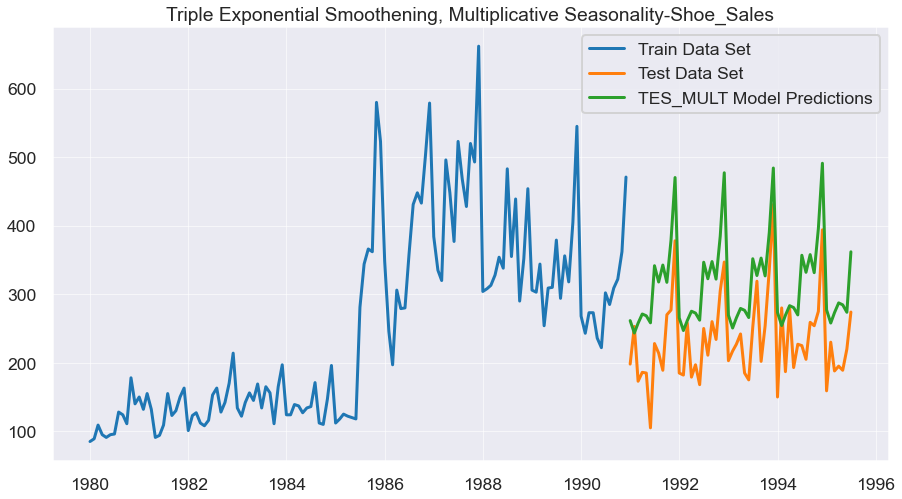

In [53]:
model_TES_MULT_df=ExponentialSmoothing(df_train,initialization_method='estimated',seasonal='mul',trend='add')
model_TES_MULT_df=model_TES_MULT_df.fit(optimized=True)
print('\n')
print('TES_MULT Model best parameters for Shoe_Sales')
display(model_TES_MULT_df.params)
TES_MULT_df_predict=model_TES_MULT_df.forecast(steps=len(df_test))
print('Predictions for test data of Shoe_Sales')
display(TES_MULT_df_predict.head())
print('\n')
plt.plot(df_train,label='Train Data Set');
plt.plot(df_test,label='Test Data Set');
plt.plot(TES_MULT_df_predict,label='TES_MULT Model Predictions');
plt.legend(loc='best');
plt.title('Triple Exponential Smoothening, Multiplicative Seasonality-Shoe_Sales');

b=np.asarray(TES_MULT_df_predict)
MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_TES_MULT_df=pd.DataFrame({'Shoe_Sales_TEST RMSE':RMSE,
                                'Shoe_Sales_MAPE':MAPE},
                                index=['TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gamma = 8.3567e-07'])
RMSE_TES_MULT_df        


In [54]:
Result=pd.concat([Result,RMSE_TES_MULT_df])
Result

Shoe_Sales_TEST RMSE  \
Linear Regression Model                                          266.276   
Naive Regression Model                                           245.121   
SIMPLE AVG Model                                                  63.985   
SES Model, Alpha=0.0987                                          196.405   
DES Model,Alpha=1.91e-08,Beta=7.30e-09                           266.660   
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...               128.993   
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...                89.146   

                                                    Shoe_Sales_MAPE  
Linear Regression Model                                     123.124  
Naive Regression Model                                      114.870  
SIMPLE AVG Model                                             24.251  
SES Model, Alpha=0.0987                                      91.799  
DES Model,Alpha=1.91e-08,Beta=7.30e-09                      123.346  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...           54.949  
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...           38.840

# QUESTION5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.
3

In [55]:
# Define the function for testing staionarity


from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=6).mean() #determining the rolling mean 0f 6 months
    rolstd = timeseries.rolling(window=6).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='6 month Rolling Mean')
    std = plt.plot(rolstd, color='orange', label = '6 month Rolling Std Deviation')
   
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

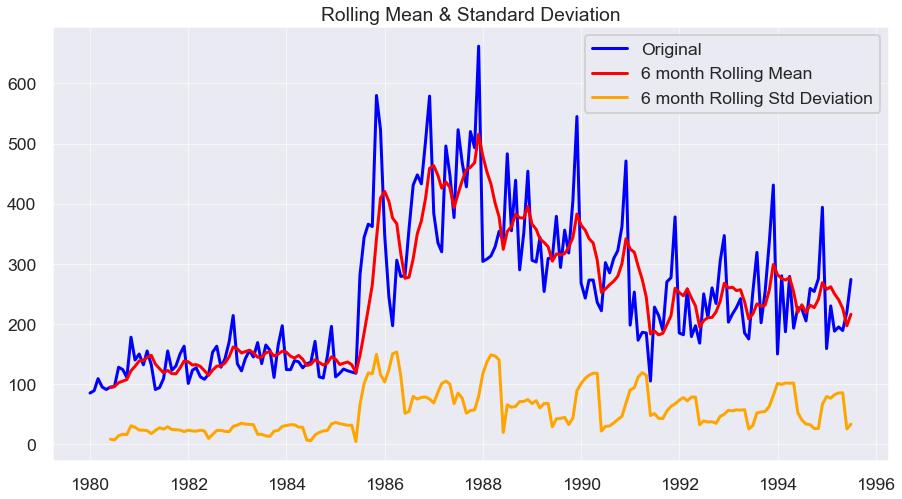

Results of Dickey-Fuller Test:
Test Statistic                  -1.717397
p-value                          0.422172
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [56]:
test_stationarity(df['Shoe_Sales'])

p-value is more than 0.05, therefore the data is not stationary

Try to make the series stationary by one level of differnecing

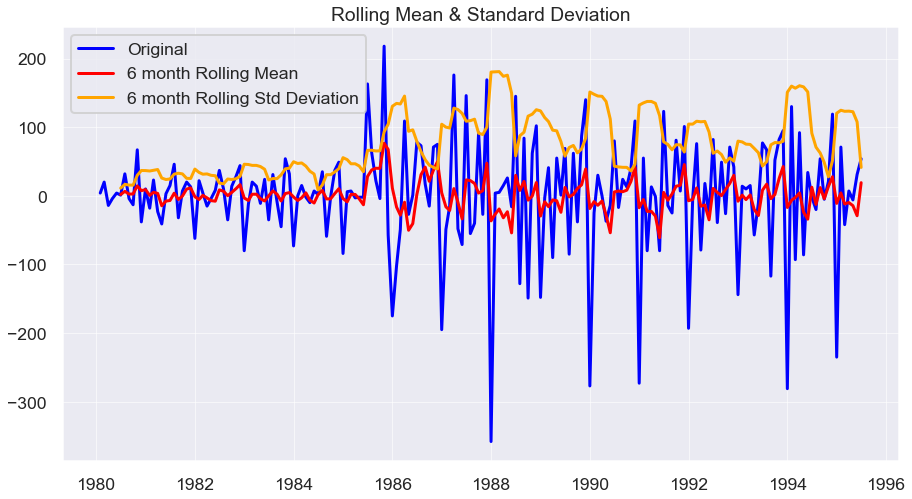

Results of Dickey-Fuller Test:
Test Statistic                  -3.479160
p-value                          0.008539
#Lags Used                      12.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [57]:
test_stationarity(df['Shoe_Sales'].diff().dropna())

Data is now stationary

# QUESTION6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### ARIMA Model

We shall test the train data set only for Staionarity

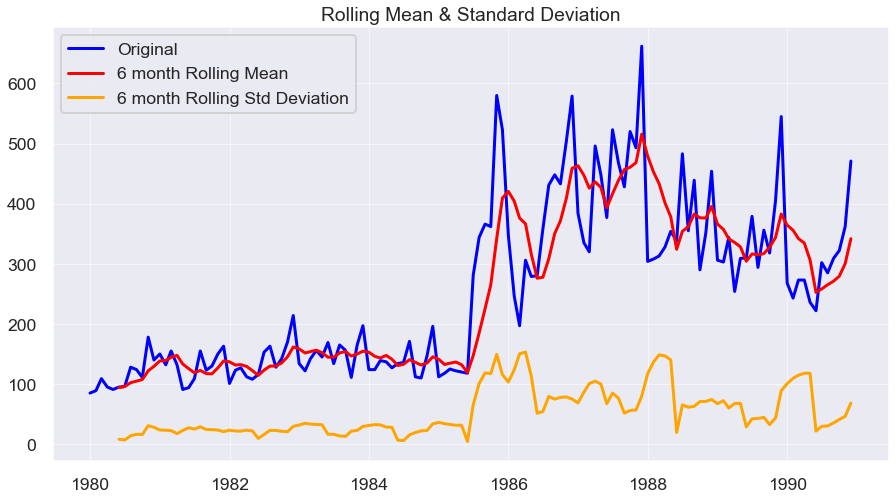

Results of Dickey-Fuller Test:
Test Statistic                  -1.361129
p-value                          0.600763
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [58]:
test_stationarity(df_train)

alpha = 0.2194 , is higher than 0.05, so null hypothesis that data is not stationary can not be rejected

do one level of differencing and then check for staionarity again

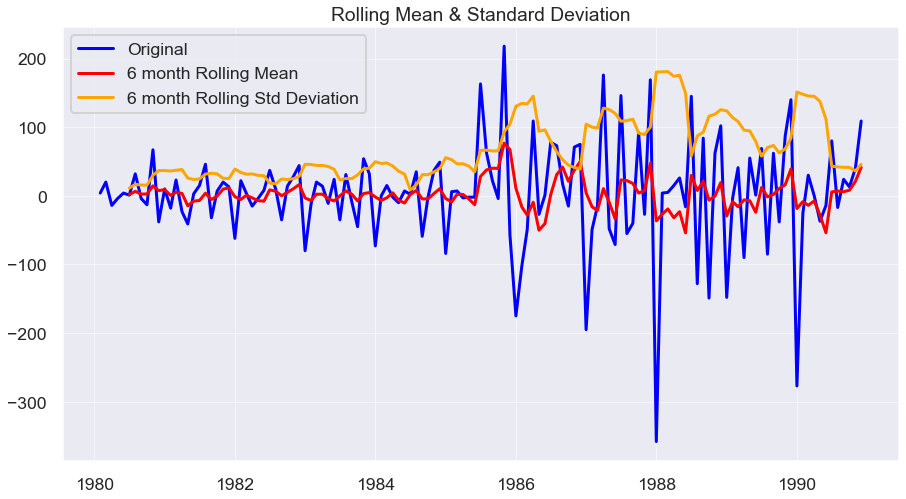

Results of Dickey-Fuller Test:
Test Statistic                  -3.144211
p-value                          0.023450
#Lags Used                      13.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64 



In [59]:
test_stationarity(df_train.diff().dropna())

After one level of differencing , d=1 , data has now become stationary , as the alpha value is less than 0.05.

### Using the AIC method for the Sparkling wine Data Set

In [60]:
df_df=df.copy()
train_df=df_train.copy()
test_df=df_test.copy()

In [61]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [62]:
# Creating an empty Dataframe with column names only
ARIMA_AIC_df = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_df

Empty DataFrame
Columns: [param, AIC]
Index: []

In [63]:
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    ARIMA_model = ARIMA(train_df['Shoe_Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC_df = ARIMA_AIC_df.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1508.2837722095956
ARIMA(0, 1, 1) - AIC:1497.0503224187926
ARIMA(0, 1, 2) - AIC:1494.9646053663378
ARIMA(0, 1, 3) - AIC:1495.148473873865
ARIMA(1, 1, 0) - AIC:1501.64312420119
ARIMA(1, 1, 1) - AIC:1492.487186507898
ARIMA(1, 1, 2) - AIC:1494.4238594574267
ARIMA(1, 1, 3) - AIC:1496.3858782557993
ARIMA(2, 1, 0) - AIC:1498.9504830258975
ARIMA(2, 1, 1) - AIC:1494.4314983035601
ARIMA(2, 1, 2) - AIC:1496.4107391810157
ARIMA(2, 1, 3) - AIC:1480.8092880585777
ARIMA(3, 1, 0) - AIC:1498.930309422774
ARIMA(3, 1, 1) - AIC:1496.3468641048712
ARIMA(3, 1, 2) - AIC:1495.6558545480107
ARIMA(3, 1, 3) - AIC:1482.5660484625228


In [64]:
ARIMA_AIC_df.sort_values(by='AIC',ascending=True).round(2).head()

param      AIC
11  (2, 1, 3)  1480.81
15  (3, 1, 3)  1482.57
5   (1, 1, 1)  1492.49
6   (1, 1, 2)  1494.42
9   (2, 1, 1)  1494.43

In [65]:
auto_ARIMA = ARIMA(train_df, order=(2,1,3))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -734.405
Date:                Wed, 25 Jan 2023   AIC                           1480.809
Time:                        09:04:30   BIC                           1498.060
Sample:                    01-01-1980   HQIC                          1487.819
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0142      0.029      0.487      0.626      -0.043       0.071
ar.L2         -0.9971      0.018    -55.476      0.000      -1.032      -0.962
ma.L1         -0.3351      0.090     -3.720      0.0

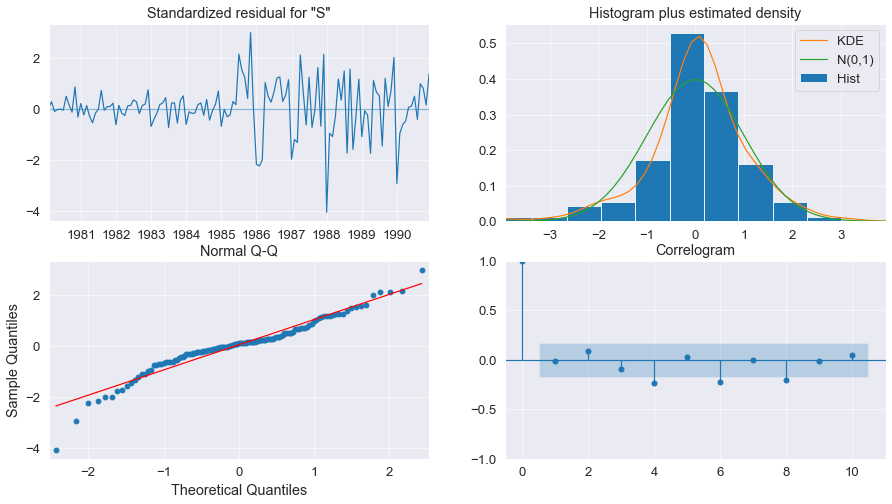

In [66]:
sns.set_context("paper", font_scale = 1.5, rc={"grid.linewidth": 0.6})
results_auto_ARIMA.plot_diagnostics();

## Predict on the Test_df Set using this model and evaluate the model.

In [67]:
predicted_auto_ARIMA_2yrs = results_auto_ARIMA.forecast(steps=len(test_df)+24)
predicted_auto_ARIMA= results_auto_ARIMA.forecast(steps=len(test_df))
#predicted_auto_ARIMA

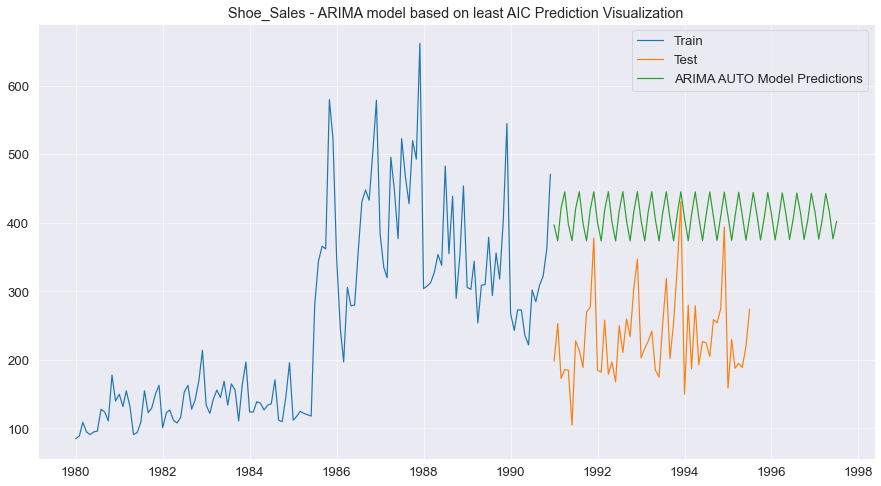

In [68]:
plt.plot(train_df,label='Train');
plt.plot(test_df,label='Test');
plt.title('Shoe_Sales - ARIMA model based on least AIC Prediction Visualization');  
plt.plot(predicted_auto_ARIMA_2yrs,label = 'ARIMA AUTO Model Predictions');
plt.legend(loc='best');

In [69]:
b=np.asarray(predicted_auto_ARIMA)
RMSE = mean_squared_error(a,b,squared=False)
MAPE = mean_absolute_percentage_error(a,b)
RMSE_ARIMA_AUTO = pd.DataFrame({'Shoe_Sales_TEST RMSE': RMSE,
                               'Shoe_Sales_MAPE':MAPE}
                           ,index=['ARIMA_AUTO(2,1,3)'])
RMSE_ARIMA_AUTO

Shoe_Sales_TEST RMSE  Shoe_Sales_MAPE
ARIMA_AUTO(2,1,3)            184.469328        85.650194

In [70]:
Result=pd.concat([Result,RMSE_ARIMA_AUTO])
Result

Shoe_Sales_TEST RMSE  \
Linear Regression Model                                       266.276000   
Naive Regression Model                                        245.121000   
SIMPLE AVG Model                                               63.985000   
SES Model, Alpha=0.0987                                       196.405000   
DES Model,Alpha=1.91e-08,Beta=7.30e-09                        266.660000   
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...            128.993000   
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...             89.146000   
ARIMA_AUTO(2,1,3)                                             184.469328   

                                                    Shoe_Sales_MAPE  
Linear Regression Model                                  123.124000  
Naive Regression Model                                   114.870000  
SIMPLE AVG Model                                          24.251000  
SES Model, Alpha=0.0987                                   91.799000  
DES Model,Alpha=1.91e-08,Beta=7.30e-09                   123.346000  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...        54.949000  
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...        38.840000  
ARIMA_AUTO(2,1,3)                                         85.650194

### SARIMA models based on least AIC

Plot the ACF and PACF plots again



In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

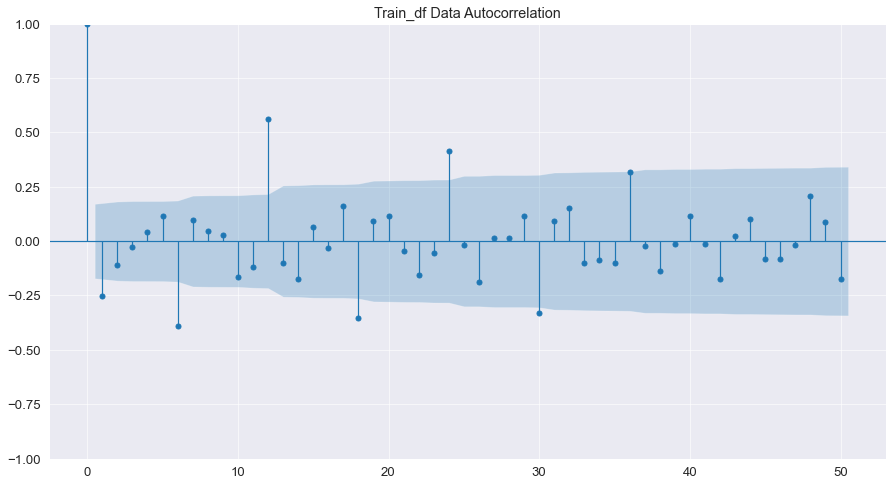

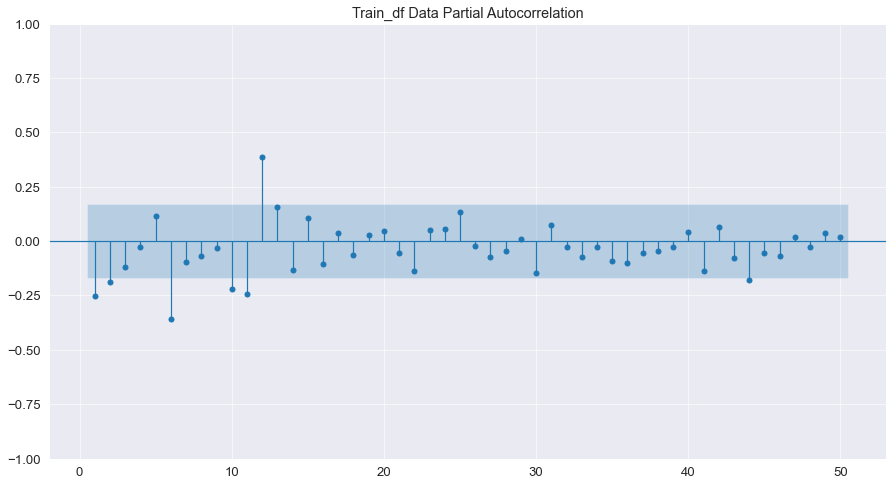

In [72]:
plot_acf(train_df.diff().dropna(),
         title='Train_df Data Autocorrelation',
        lags=50)
plot_pacf(train_df.diff(1).dropna(),
          title='Train_df Data Partial Autocorrelation',
          zero=False,
          method='ywmle',
         lags=50);

We shall take seasaonality as 12 ( f ) and differencing has been done only once , so d = 1

In [73]:
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [74]:
SARIMA_AIC_df = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_df

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [75]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_df['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_df = SARIMA_AIC_df.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1338.3663267373167
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1208.4142473347138
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:2894.4937955644104
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1327.3970510547892
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1312.5867978686551
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1187.084399500866
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4253.131230106119
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1201.0600831567197
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1200.7545174421416
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1188.039630501081
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:2561.8234519102157
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1071.7371393677752
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1073.5912665501492
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1074.3858105914205
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3519.971415364299
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1476.016777738261
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1318.3861206387694
SARIMA(0, 1, 1)

KeyboardInterrupt: 

In [76]:
SARIMA_AIC_df.sort_values(by=['AIC']).head()

param       seasonal          AIC
47  (0, 1, 2)  (3, 0, 3, 12)    99.847419
63  (0, 1, 3)  (3, 0, 3, 12)   230.534029
28  (0, 1, 1)  (3, 0, 0, 12)  1063.853592
60  (0, 1, 3)  (3, 0, 0, 12)  1064.814556
29  (0, 1, 1)  (3, 0, 1, 12)  1064.988494

In [77]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train_df['Shoe_Sales'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                              Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -507.955
Date:                                 Wed, 25 Jan 2023   AIC                           1035.910
Time:                                         09:06:35   BIC                           1061.128
Sample:                                     01-01-1980   HQIC                          1046.088
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3379      0.253      1.336      0.182      -0.158       0

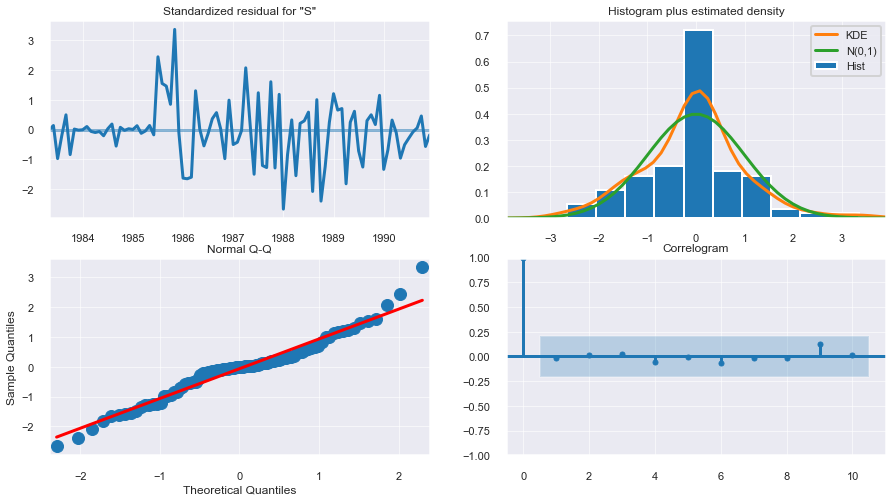

In [78]:
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
results_auto_SARIMA.plot_diagnostics();

### Predict on the Test_df Set using this model and evaluate the model.

In [79]:
predicted_auto_SARIMA_2yrs = results_auto_SARIMA.get_forecast(steps=len(test_df)+24)
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test_df))
SARIMA_auto_2Yrs=predicted_auto_SARIMA_2yrs.summary_frame(alpha=0.05)
display(SARIMA_auto_2Yrs.round(3).head())
SARIMA_auto_2Yrs['mean'].round(3).head()

Shoe_Sales     mean  mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  226.703   57.103        114.783        338.623
1991-02-01  204.643   66.558         74.192        335.094
1991-03-01  219.164   77.705         66.866        371.463
1991-04-01  246.818   83.338         83.479        410.158
1991-05-01  230.086   88.863         55.918        404.254

1991-01-01    226.703
1991-02-01    204.643
1991-03-01    219.164
1991-04-01    246.818
1991-05-01    230.086
Freq: MS, Name: mean, dtype: float64

In [80]:
b=np.asarray(predicted_auto_SARIMA.predicted_mean)
RMSE= mean_squared_error(a,b,squared=False)
MAPE = mean_absolute_percentage_error(test_df['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean)
RMSE_SARIMA_AUTO = pd.DataFrame({'Shoe_Sales_TEST RMSE': RMSE,
                               'Shoe_Sales_MAPE':MAPE},
                                index=['SARIMA_AUTO(3,1,1)(3,0,2,12)'])
RMSE_SARIMA_AUTO

Shoe_Sales_TEST RMSE  Shoe_Sales_MAPE
SARIMA_AUTO(3,1,1)(3,0,2,12)             90.404287         36.64525

In [81]:
Result=pd.concat([Result,RMSE_SARIMA_AUTO])
Result

Shoe_Sales_TEST RMSE  \
Linear Regression Model                                       266.276000   
Naive Regression Model                                        245.121000   
SIMPLE AVG Model                                               63.985000   
SES Model, Alpha=0.0987                                       196.405000   
DES Model,Alpha=1.91e-08,Beta=7.30e-09                        266.660000   
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...            128.993000   
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...             89.146000   
ARIMA_AUTO(2,1,3)                                             184.469328   
SARIMA_AUTO(3,1,1)(3,0,2,12)                                   90.404287   

                                                    Shoe_Sales_MAPE  
Linear Regression Model                                  123.124000  
Naive Regression Model                                   114.870000  
SIMPLE AVG Model                                          24.251000  
SES Model, Alpha=0.0987                                   91.799000  
DES Model,Alpha=1.91e-08,Beta=7.30e-09                   123.346000  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...        54.949000  
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...        38.840000  
ARIMA_AUTO(2,1,3)                                         85.650194  
SARIMA_AUTO(3,1,1)(3,0,2,12)                              36.645250

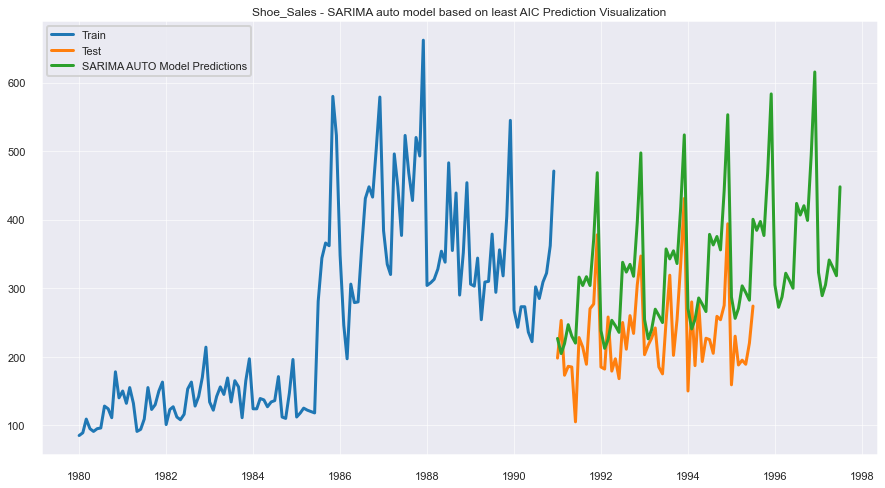

In [82]:
plt.plot(train_df,label='Train');
plt.plot(test_df,label='Test');
plt.title('Shoe_Sales - SARIMA auto model based on least AIC Prediction Visualization');  
plt.plot(SARIMA_auto_2Yrs['mean'],label = 'SARIMA AUTO Model Predictions');
plt.legend(loc='best');

### QUESTION7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## ARIMA Manual Model

Now we shall plot the ACF and PACF plots OF THE DIFFERENCED DATA

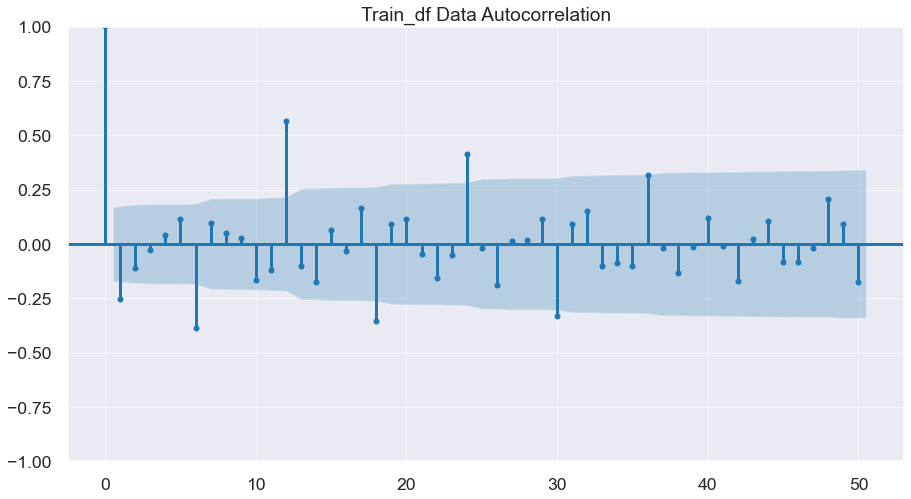

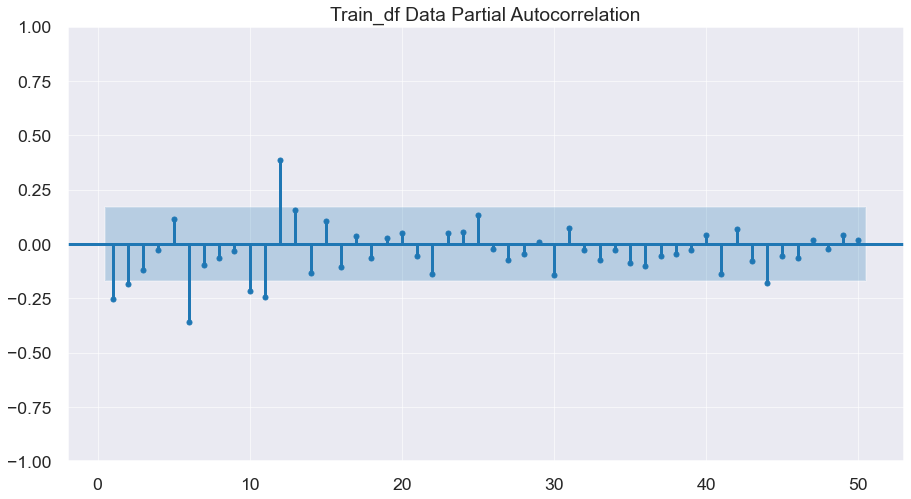

In [83]:
sns.set_context("poster", font_scale = .8, rc={"grid.linewidth": 0.6})
plot_acf(train_df.diff().dropna(),
         title='Train_df Data Autocorrelation',
         lags=50);
plot_pacf(train_df.diff().dropna(),
          title='Train_df Data Partial Autocorrelation',
          zero=False,
          method='ywmle',
         lags=50);

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off after 2.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off after 2.


p=2,d=1,q=2

In [84]:
manual_ARIMA = ARIMA(train_df['Shoe_Sales'], order=(2,1,2))
results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())


                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -743.205
Date:                Wed, 25 Jan 2023   AIC                           1496.411
Time:                        09:06:40   BIC                           1510.787
Sample:                    01-01-1980   HQIC                          1502.252
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6739      4.219      0.160      0.873      -7.594       8.942
ar.L2         -0.0695      1.993     -0.035      0.972      -3.976       3.837
ma.L1         -1.0484      4.221     -0.248      0.8

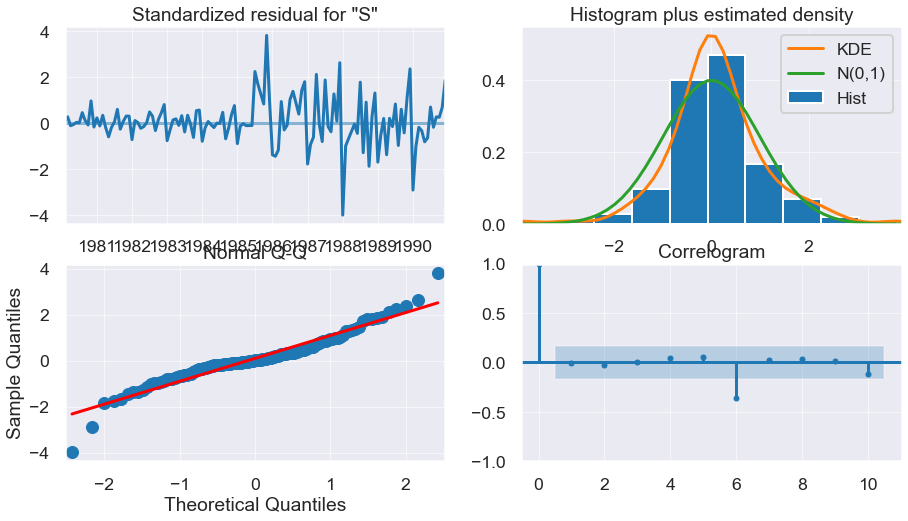

In [85]:
results_manual_ARIMA.plot_diagnostics();

## Predict on the Test_df Set using this model and evaluate the model.

In [86]:
predicted_manual_ARIMA_2yrs = results_manual_ARIMA.forecast(steps=len(test_df)+24)
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_df))

In [87]:
b=np.asarray(predicted_manual_ARIMA)
RMSE= mean_squared_error(a,b,squared=False)
MAPE= mean_absolute_percentage_error(a,b)
RMSE_ARIMA_MANUAL = pd.DataFrame({'Shoe_Sales_TEST RMSE': RMSE,
                               'Shoe_Sales_MAPE':MAPE},
                                index=['ARIMA_MANUAL(2,1,2)'])
RMSE_ARIMA_MANUAL

Shoe_Sales_TEST RMSE  Shoe_Sales_MAPE
ARIMA_MANUAL(2,1,2)             143.55827        66.616022

In [88]:
Result=pd.concat([Result,RMSE_ARIMA_MANUAL])
Result

Shoe_Sales_TEST RMSE  \
Linear Regression Model                                       266.276000   
Naive Regression Model                                        245.121000   
SIMPLE AVG Model                                               63.985000   
SES Model, Alpha=0.0987                                       196.405000   
DES Model,Alpha=1.91e-08,Beta=7.30e-09                        266.660000   
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...            128.993000   
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...             89.146000   
ARIMA_AUTO(2,1,3)                                             184.469328   
SARIMA_AUTO(3,1,1)(3,0,2,12)                                   90.404287   
ARIMA_MANUAL(2,1,2)                                           143.558270   

                                                    Shoe_Sales_MAPE  
Linear Regression Model                                  123.124000  
Naive Regression Model                                   114.870000  
SIMPLE AVG Model                                          24.251000  
SES Model, Alpha=0.0987                                   91.799000  
DES Model,Alpha=1.91e-08,Beta=7.30e-09                   123.346000  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...        54.949000  
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...        38.840000  
ARIMA_AUTO(2,1,3)                                         85.650194  
SARIMA_AUTO(3,1,1)(3,0,2,12)                              36.645250  
ARIMA_MANUAL(2,1,2)                                       66.616022

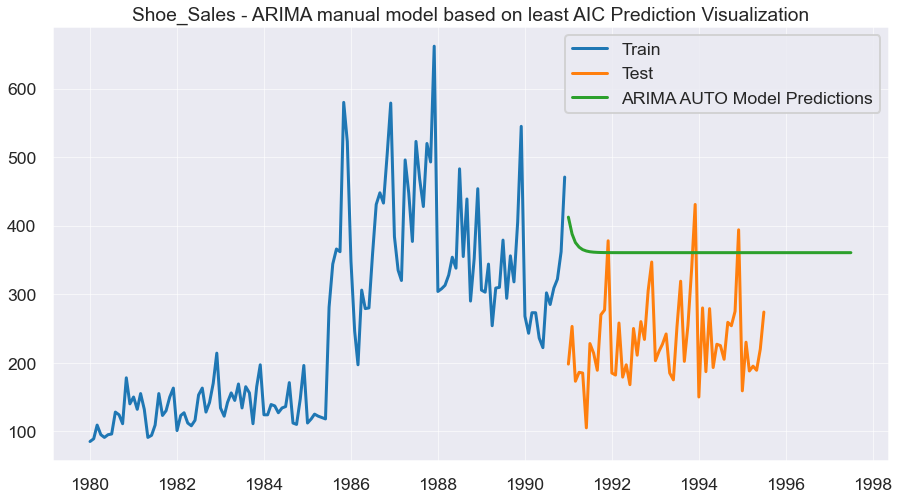

In [89]:
plt.plot(train_df,label='Train');
plt.plot(test_df,label='Test');
plt.title('Shoe_Sales - ARIMA manual model based on least AIC Prediction Visualization');  
plt.plot(predicted_manual_ARIMA_2yrs,label = 'ARIMA AUTO Model Predictions');
plt.legend(loc='best');

## SARIMA Manual Model

Plot the ACF and PACF plot again

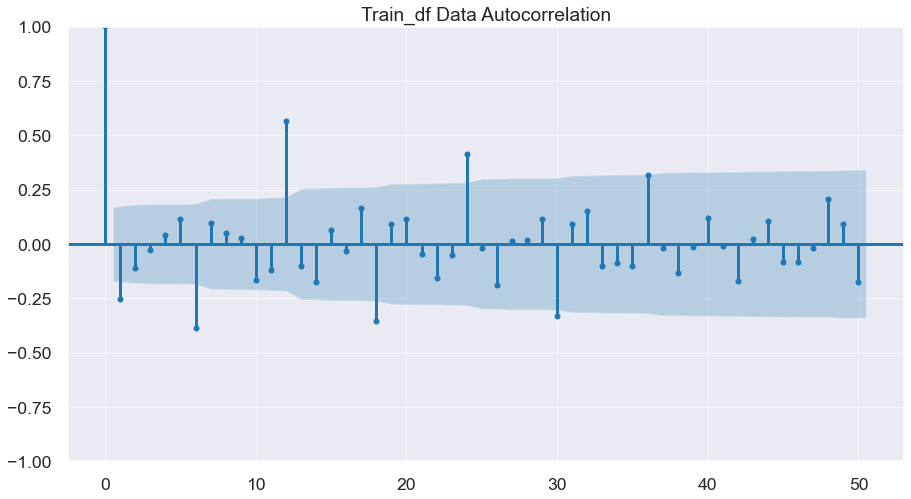

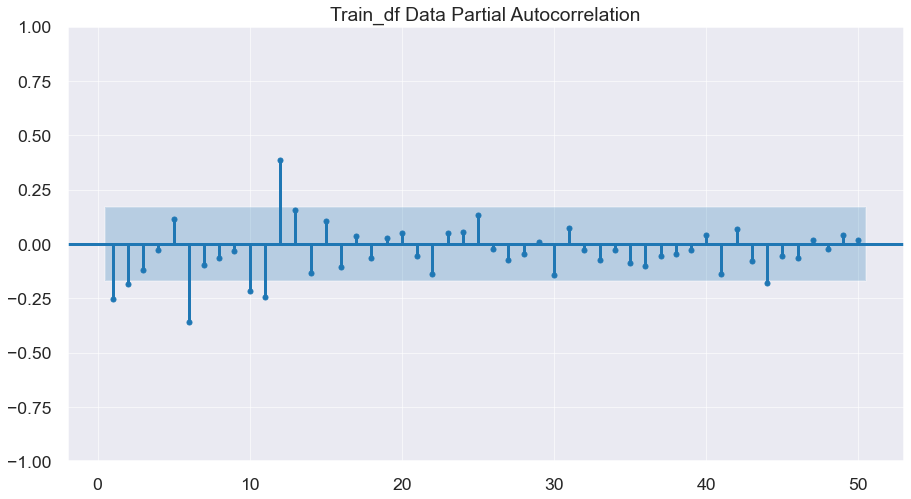

In [90]:
sns.set_context("poster", font_scale = .8, rc={"grid.linewidth": 0.6})
plot_acf(train_df.diff().dropna(),
         title='Train_df Data Autocorrelation',
         lags=50);
plot_pacf(train_df.diff().dropna(),
          title='Train_df Data Partial Autocorrelation',
          zero=False,
          method='ywmle',
         lags=50);

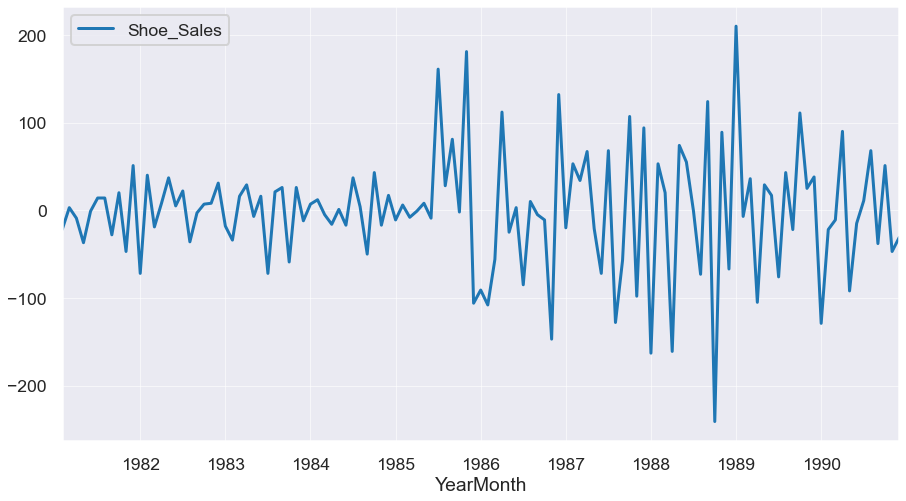

In [91]:
train_df.diff(12).dropna().diff().dropna().plot(); # diff 12 and diff 1 again 

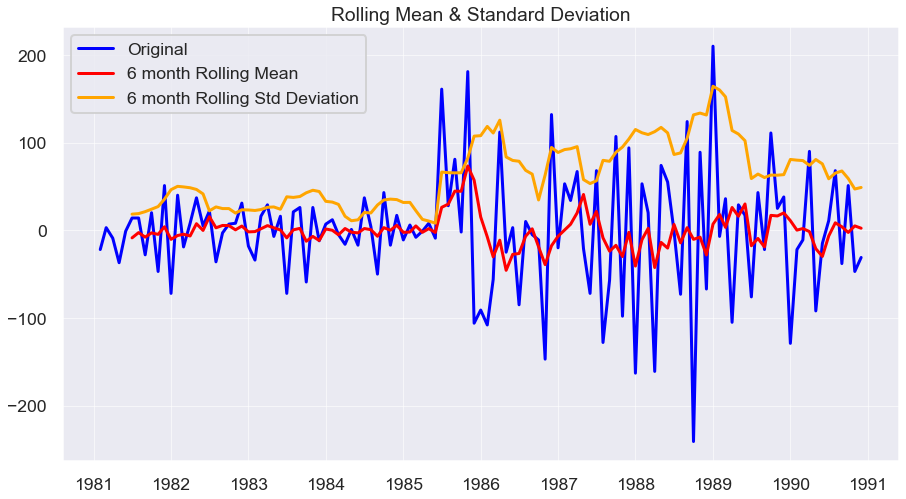

Results of Dickey-Fuller Test:
Test Statistic                -1.613263e+01
p-value                        4.767500e-29
#Lags Used                     0.000000e+00
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [92]:
test_stationarity(train_df.diff(12).dropna().diff().dropna())

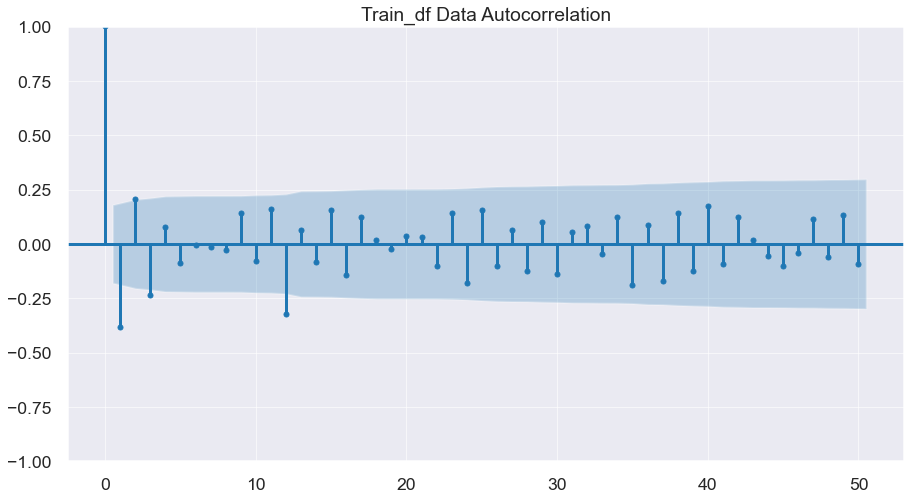

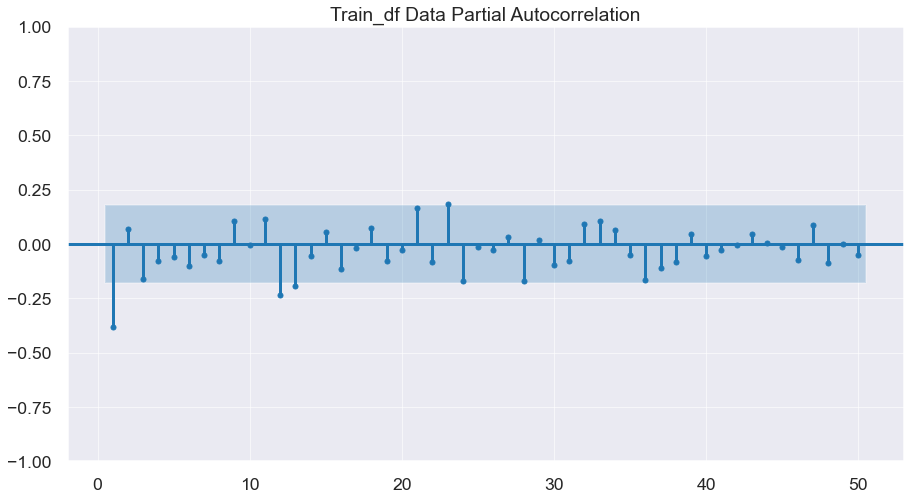

In [93]:
plot_acf(train_df.diff(12).dropna().diff().dropna(),
         title='Train_df Data Autocorrelation',
         lags=50);
plot_pacf(train_df.diff(12).dropna().diff().dropna(),
          title='Train_df Data Partial Autocorrelation',
          zero=False,
          method='ywmle',
         lags=50);

In [94]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train_df['Shoe_Sales'],
                                order=(4, 0, 2),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(4, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -512.087
Date:                            Wed, 25 Jan 2023   AIC                           1044.173
Time:                                    09:06:59   BIC                           1069.499
Sample:                                01-01-1980   HQIC                          1054.399
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7983      0.931      1.932      0.053      -0.026       3.622
ar.L2         -0.7464      1.445   

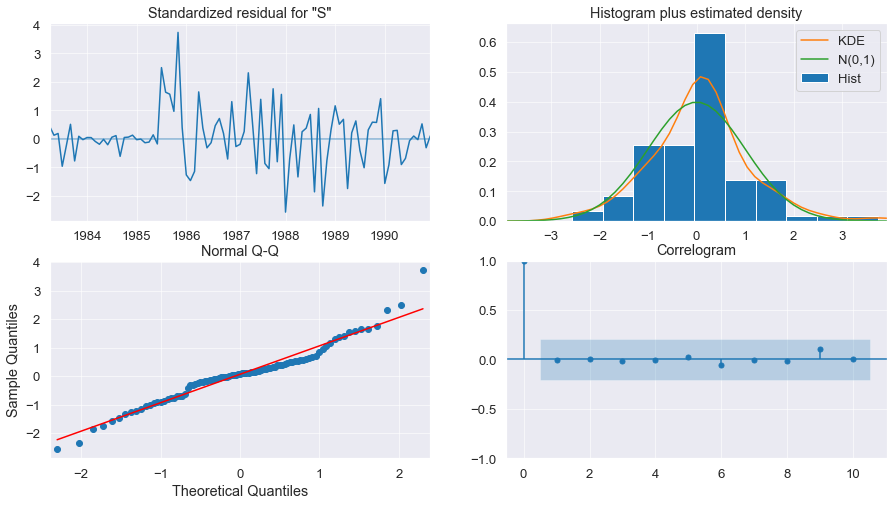

In [95]:
sns.set_context("notebook", font_scale = 1.2, rc={"grid.linewidth": 0.6})
results_manual_SARIMA.plot_diagnostics();

In [96]:
sns.set_context("poster", font_scale = 0.8, rc={"grid.linewidth": 0.6})

In [97]:
predicted_manual_SARIMA_2yrs = results_manual_SARIMA.get_forecast(steps=len(test_df)+24)
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test_df))
SARIMA_manual_2Yrs=predicted_manual_SARIMA_2yrs.summary_frame(alpha=0.05)
display(predicted_manual_SARIMA.summary_frame(alpha=0.05).head())
SARIMA_manual_2Yrs['mean']

Shoe_Sales        mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  255.961090  56.669634     144.890648     367.031532
1991-02-01  236.707630  64.718176     109.862337     363.552923
1991-03-01  248.538874  74.383932     102.749047     394.328701
1991-04-01  264.420842  79.153284     109.283255     419.558429
1991-05-01  246.267819  82.884851      83.816497     408.719142

1991-01-01    255.961090
1991-02-01    236.707630
1991-03-01    248.538874
1991-04-01    264.420842
1991-05-01    246.267819
                 ...    
1997-03-01    258.993694
1997-04-01    280.333357
1997-05-01    270.823282
1997-06-01    265.679452
1997-07-01    338.810898
Freq: MS, Name: mean, Length: 79, dtype: float64

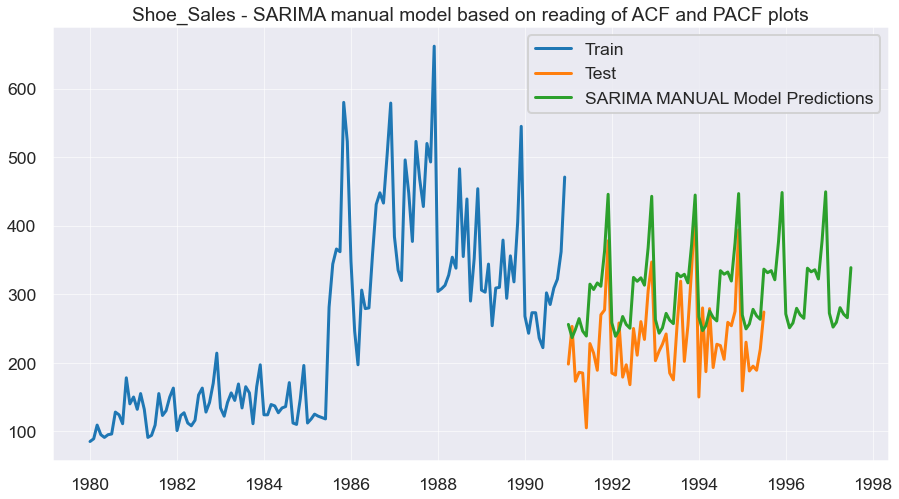

In [98]:
plt.plot(train_df,label='Train');
plt.plot(test_df,label='Test');
plt.title('Shoe_Sales - SARIMA manual model based on reading of ACF and PACF plots');  
plt.plot(SARIMA_manual_2Yrs['mean'],label = 'SARIMA MANUAL Model Predictions');
plt.legend(loc='best');

In [99]:
a=np.asarray(df_test['Shoe_Sales'])
a.shape

(55,)

In [100]:
b=np.asarray(predicted_manual_SARIMA.predicted_mean)
RMSE= mean_squared_error(a,b,squared=False)
MAPE= mean_absolute_percentage_error(a,b)
RMSE_SARIMA_MANUAL = pd.DataFrame({'Shoe_Sales_TEST RMSE': RMSE,
                               'Shoe_Sales_MAPE':MAPE},
                                index=['SARIMA_MANUAL(4,0,2)(1,1,2,12)'])
RMSE_SARIMA_MANUAL


Shoe_Sales_TEST RMSE  Shoe_Sales_MAPE
SARIMA_MANUAL(4,0,2)(1,1,2,12)             74.948491        32.882959

In [101]:
Results=pd.concat([Result,RMSE_SARIMA_MANUAL])
Results.round(2).sort_values(by='Shoe_Sales_TEST RMSE')

Shoe_Sales_TEST RMSE  \
SIMPLE AVG Model                                                   63.98   
SARIMA_MANUAL(4,0,2)(1,1,2,12)                                     74.95   
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...                 89.15   
SARIMA_AUTO(3,1,1)(3,0,2,12)                                       90.40   
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...                128.99   
ARIMA_MANUAL(2,1,2)                                               143.56   
ARIMA_AUTO(2,1,3)                                                 184.47   
SES Model, Alpha=0.0987                                           196.40   
Naive Regression Model                                            245.12   
Linear Regression Model                                           266.28   
DES Model,Alpha=1.91e-08,Beta=7.30e-09                            266.66   

                                                    Shoe_Sales_MAPE  
SIMPLE AVG Model                                              24.25  
SARIMA_MANUAL(4,0,2)(1,1,2,12)                                32.88  
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...            38.84  
SARIMA_AUTO(3,1,1)(3,0,2,12)                                  36.65  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...            54.95  
ARIMA_MANUAL(2,1,2)                                           66.62  
ARIMA_AUTO(2,1,3)                                             85.65  
SES Model, Alpha=0.0987                                       91.80  
Naive Regression Model                                       114.87  
Linear Regression Model                                      123.12  
DES Model,Alpha=1.91e-08,Beta=7.30e-09                       123.35

### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [102]:
Results.round(1).sort_values(by='Shoe_Sales_TEST RMSE')

Shoe_Sales_TEST RMSE  \
SIMPLE AVG Model                                                    64.0   
SARIMA_MANUAL(4,0,2)(1,1,2,12)                                      74.9   
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...                  89.1   
SARIMA_AUTO(3,1,1)(3,0,2,12)                                        90.4   
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...                 129.0   
ARIMA_MANUAL(2,1,2)                                                143.6   
ARIMA_AUTO(2,1,3)                                                  184.5   
SES Model, Alpha=0.0987                                            196.4   
Naive Regression Model                                             245.1   
Linear Regression Model                                            266.3   
DES Model,Alpha=1.91e-08,Beta=7.30e-09                             266.7   

                                                    Shoe_Sales_MAPE  
SIMPLE AVG Model                                               24.3  
SARIMA_MANUAL(4,0,2)(1,1,2,12)                                 32.9  
TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gam...             38.8  
SARIMA_AUTO(3,1,1)(3,0,2,12)                                   36.6  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...             54.9  
ARIMA_MANUAL(2,1,2)                                            66.6  
ARIMA_AUTO(2,1,3)                                              85.7  
SES Model, Alpha=0.0987                                        91.8  
Naive Regression Model                                        114.9  
Linear Regression Model                                       123.1  
DES Model,Alpha=1.91e-08,Beta=7.30e-09                        123.3

# QUESTION9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.
#### 3

## We select the Triple Exponential Smoothening with ADDITIVE seasonality and ADDITIVE trend , which has the least RMSE

we shall check the RMSE for the Train and Test data for the selected model to ascertain if the model is a right fit and not over fit or underfit.

In [103]:
atrain=np.asarray(df_train['Shoe_Sales'])
atrain.shape

(132,)

In [104]:
model_TES_ADD_df_FULLDATA=ExponentialSmoothing(df,initialization_method='estimated',seasonal='add',trend='add')
                                                
model_TES_ADD_df_FULLDATA=model_TES_ADD_df_FULLDATA.fit(smoothing_level=0.08830330642635406,
                                                            smoothing_trend=6.730635331927582e-05,
                                                            smoothing_seasonal=0.004455138229351625)   

In [105]:
TES_ADD_df_predict_atrain=model_TES_ADD_df_FULLDATA.predict(start=0,end=131)
TES_ADD_df_predict_atrain
btrain=np.asarray(TES_ADD_df_predict_atrain)
btrain.shape

(132,)

In [106]:
RMSEtrain=mean_squared_error(atrain,btrain,squared=False)
RMSEtrain

69.94873022146572

In [107]:
display(df_train.shape)
display(df_test.shape)
display(df.shape)

(132, 1)

(55, 1)

(187, 1)

In [108]:
atest=np.asarray(df_test['Shoe_Sales'])

In [109]:
TES_ADD_df_predict_atest=model_TES_ADD_df_FULLDATA.predict(start=132,end=186)
TES_ADD_df_predict_atest
btest=np.asarray(TES_ADD_df_predict_atest)
display(btest)
display(atest)

array([284.11632658, 281.28625665, 277.60205728, 281.88475378,
       258.97678513, 245.69847936, 297.86786216, 291.02833629,
       283.76670088, 272.29219869, 328.10582702, 389.41186715,
       218.37621634, 220.45625805, 215.52930061, 232.83400284,
       213.73326572, 205.209246  , 266.82999392, 264.63966496,
       259.36211739, 256.72252676, 310.5128814 , 376.02030571,
       203.33034695, 208.30444192, 207.90059279, 222.71124922,
       210.23198388, 200.86542736, 263.57788321, 261.68659089,
       266.44829009, 257.95682403, 313.48055782, 381.35840098,
       215.74263456, 214.98069946, 219.59698791, 229.84343234,
       219.80333254, 210.29527389, 276.83079628, 271.69204788,
       264.96054201, 261.90293495, 317.19584568, 379.47923944,
       210.24721694, 211.34700659, 211.43299614, 222.85182257,
       205.67170558, 197.25068787, 264.01321827])

array([198, 253, 173, 186, 185, 105, 228, 214, 189, 270, 277, 378, 185,
       182, 258, 179, 197, 168, 250, 211, 260, 234, 305, 347, 203, 217,
       227, 242, 185, 175, 252, 319, 202, 254, 336, 431, 150, 280, 187,
       279, 193, 227, 225, 205, 259, 254, 275, 394, 159, 230, 188, 195,
       189, 220, 274], dtype=int64)

In [110]:
atest=np.asarray(df_test['Shoe_Sales'])

In [111]:
RMSEtest=mean_squared_error(atest,btest,squared=False)
RMSEtest

48.578660408547

In [112]:
Mapetrain=mean_absolute_percentage_error(atrain,btrain)
Mapetest=mean_absolute_percentage_error(atest,btest)
display(Mapetrain)
display(Mapetest)

20.96661941584334

19.36128360378224

In [113]:
Fitment_test_RMSE=pd.DataFrame({'TRAIN RMSE':RMSEtrain,
                               'TEST RMSE': RMSEtest},
                                index=['TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=0.004455'])
Fitment_test_RMSE.round(2)

TRAIN RMSE  TEST RMSE
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...       69.95      48.58

In [114]:
Fitment_test_MAPE=pd.DataFrame({'TRAIN MAPE':Mapetrain,
                               'TEST MAPE': Mapetest},
                                index=['TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=0.004455'])
Fitment_test_MAPE.round(2)

TRAIN MAPE  TEST MAPE
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...       20.97      19.36

In [115]:
Fitment_test=pd.concat([Fitment_test_RMSE,Fitment_test_MAPE],axis=1,join='inner')
Fitment_test.round(2)

TRAIN RMSE  TEST RMSE  \
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...       69.95      48.58   

                                                    TRAIN MAPE  TEST MAPE  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...       20.97      19.36

TES_ADD model is fitted on the full data and predictions are made for future 12 months



TES_ADD Model best parameters for Shoe_Sales


{'smoothing_level': 0.08830330642635406,
 'smoothing_trend': 6.730635331927582e-05,
 'smoothing_seasonal': 0.004455138229351625,
 'damping_trend': nan,
 'initial_level': 119.4351318049882,
 'initial_trend': 0.701200127258396,
 'initial_seasons': array([-42.28447139, -37.08932586, -39.51787285, -26.75972245,
        -42.12562412, -49.59602754,  14.37096028,  13.02505362,
         11.73568267,   8.4820736 ,  63.62076   , 129.12597137]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Predictions for test data of Shoe_Sales using the TES-Additive Model


1995-08-01    264.27
1995-09-01    263.69
1995-10-01    261.15
1995-11-01    316.99
1995-12-01    383.25
1996-01-01    212.44
1996-02-01    218.38
1996-03-01    216.63
1996-04-01    230.10
1996-05-01    215.43
1996-06-01    208.66
1996-07-01    273.31
Freq: MS, dtype: float64

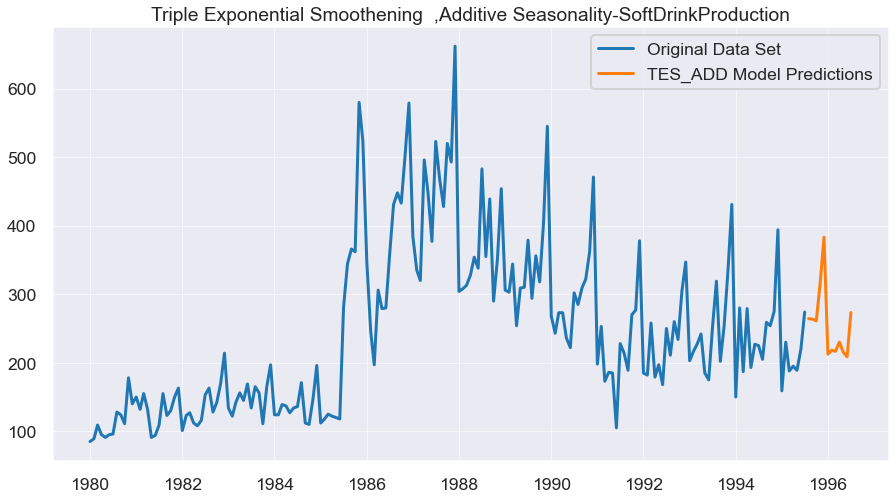

In [116]:
model_TES_ADD_df_FULLDATA=ExponentialSmoothing(df,initialization_method='estimated',seasonal='add',trend='add')
                                                
model_TES_ADD_df_FULLDATA=model_TES_ADD_df_FULLDATA.fit(smoothing_level=0.08830330642635406,
                                                            smoothing_trend=6.730635331927582e-05,
                                                            smoothing_seasonal=0.004455138229351625)   
               
print('\n')
print('TES_ADD Model best parameters for Shoe_Sales')
display(model_TES_ADD_df_FULLDATA.params)
TES_ADD_df_predict_1yrahead=model_TES_ADD_df_FULLDATA.forecast(steps=12)

print('Predictions for test data of Shoe_Sales using the TES-Additive Model')
display(TES_ADD_df_predict_1yrahead.round(2))
print('\n')
plt.plot(df,label='Original Data Set');

plt.plot(TES_ADD_df_predict_1yrahead,label='TES_ADD Model Predictions');
plt.legend(loc='best');
plt.title('Triple Exponential Smoothening  ,Additive Seasonality-SoftDrinkProduction');

In [117]:
predictions =pd.DataFrame(TES_ADD_df_predict_1yrahead.round(2),
                         columns=['Predicted Sales'])
predictions

Predicted Sales
1995-08-01           264.27
1995-09-01           263.69
1995-10-01           261.15
1995-11-01           316.99
1995-12-01           383.25
1996-01-01           212.44
1996-02-01           218.38
1996-03-01           216.63
1996-04-01           230.10
1996-05-01           215.43
1996-06-01           208.66
1996-07-01           273.31

In [118]:
a=np.asarray(df['Shoe_Sales'])
a


array([ 85,  89, 109,  95,  91,  95,  96, 128, 124, 111, 178, 140, 150,
       132, 155, 132,  91,  94, 109, 155, 123, 130, 150, 163, 101, 123,
       127, 112, 108, 116, 153, 163, 128, 142, 170, 214, 134, 122, 142,
       156, 145, 169, 134, 165, 156, 111, 165, 197, 124, 124, 139, 137,
       127, 134, 136, 171, 112, 110, 147, 196, 112, 118, 125, 122, 120,
       118, 281, 344, 366, 362, 580, 523, 348, 246, 197, 306, 279, 280,
       358, 431, 448, 433, 504, 579, 384, 335, 320, 496, 448, 377, 523,
       468, 428, 520, 493, 662, 304, 308, 313, 328, 354, 338, 483, 355,
       439, 290, 352, 454, 306, 303, 344, 254, 309, 310, 379, 294, 356,
       318, 405, 545, 268, 243, 273, 273, 236, 222, 302, 285, 309, 322,
       362, 471, 198, 253, 173, 186, 185, 105, 228, 214, 189, 270, 277,
       378, 185, 182, 258, 179, 197, 168, 250, 211, 260, 234, 305, 347,
       203, 217, 227, 242, 185, 175, 252, 319, 202, 254, 336, 431, 150,
       280, 187, 279, 193, 227, 225, 205, 259, 254, 275, 394, 15

In [119]:
TES_ADD_df_predict=model_TES_ADD_df_FULLDATA.predict(start=0,end=(len(df)-1))
TES_ADD_df_predict
b=np.asarray(TES_ADD_df_predict)
b

array([ 77.85186055,  84.37945303,  83.06018569,  98.81033171,
        83.80936674,  77.67536434, 143.87372208, 139.00167024,
       137.44201281, 133.70254705, 187.53750605, 252.90144998,
        72.25353669,  85.00340815,  87.52079216, 106.80643602,
        94.41576721,  87.39041538, 152.35214971, 148.04368334,
       148.0590558 , 143.25259306, 197.98080577, 259.48948953,
        81.14017794,  88.64113712,  90.13341011, 106.52687762,
        92.2666603 ,  86.97630626, 153.69423135, 153.37652216,
       153.48458747, 148.69295239, 203.84552715, 266.38621695,
        92.44991162, 101.93110639, 102.17293331, 118.68820926,
       107.28560233, 103.99602941, 173.75951895, 170.03873484,
       168.69613219, 165.11802052, 215.9620958 , 276.90889224,
       100.96073693, 108.71154692, 108.61912612, 124.28886555,
       110.71538622, 105.65459723, 171.71358618, 168.50408924,
       167.79208276, 160.22303661, 211.42425576, 271.05240081,
        95.9908307 , 103.08538014, 103.02623613, 117.87

In [120]:
RMSE=mean_squared_error(a,b,squared=False)
MAPE=mean_absolute_percentage_error(a,b)
Full_Data_Final_TES_ADD_model_result=pd.DataFrame({'Shoe_Sales_TEST RMSE': RMSE,
                               'Shoe_Sales_MAPE':MAPE},
                                index=['TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=0.004455'])
Full_Data_Final_TES_ADD_model_result.round(2)

Shoe_Sales_TEST RMSE  \
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...                  64.4   

                                                    Shoe_Sales_MAPE  
TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=...            20.49

In [121]:
model_TES_ADD_df_FULLDATA.resid

YearMonth
1980-01-01     7.148139
1980-02-01     4.620547
1980-03-01    25.939814
1980-04-01    -3.810332
1980-05-01     7.190633
                ...    
1995-03-01   -23.432996
1995-04-01   -27.851823
1995-05-01   -16.671706
1995-06-01    22.749312
1995-07-01     9.986782
Length: 187, dtype: float64

In [122]:
stddev=np.std(model_TES_ADD_df_FULLDATA.resid,ddof=1)
stddev

64.57662883597716

In [123]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_ci':TES_ADD_df_predict_1yrahead - 1.96*stddev,
                          'prediction':TES_ADD_df_predict_1yrahead,
                          'upper_ci': TES_ADD_df_predict_1yrahead + 1.96*stddev})
pred_1_df.round(2)

lower_ci  prediction  upper_ci
1995-08-01    137.70      264.27    390.84
1995-09-01    137.12      263.69    390.26
1995-10-01    134.58      261.15    387.72
1995-11-01    190.42      316.99    443.56
1995-12-01    256.68      383.25    509.82
1996-01-01     85.87      212.44    339.01
1996-02-01     91.81      218.38    344.95
1996-03-01     90.06      216.63    343.20
1996-04-01    103.53      230.10    356.67
1996-05-01     88.86      215.43    342.00
1996-06-01     82.09      208.66    335.23
1996-07-01    146.74      273.31    399.88

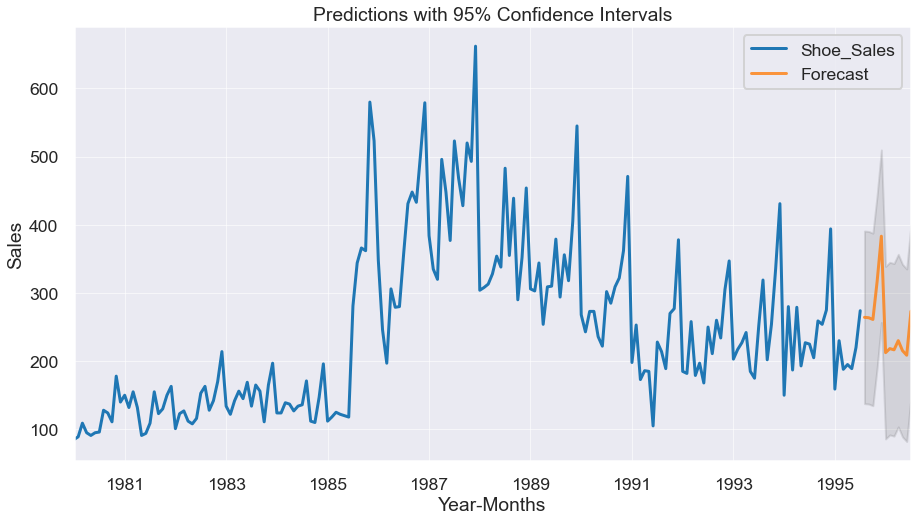

In [124]:
axis = df.plot(label='Actual', figsize=(15,8));
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.8);
axis.fill_between(pred_1_df.index, pred_1_df['lower_ci'], pred_1_df['upper_ci'], color='k', alpha=.1);
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best');
plt.title('Predictions with 95% Confidence Intervals');

In [125]:
ninetys=df['1990-01-01':'1995-07-01']
ninetys

Shoe_Sales
YearMonth             
1990-01-01         268
1990-02-01         243
1990-03-01         273
1990-04-01         273
1990-05-01         236
...                ...
1995-03-01         188
1995-04-01         195
1995-05-01         189
1995-06-01         220
1995-07-01         274

[67 rows x 1 columns]

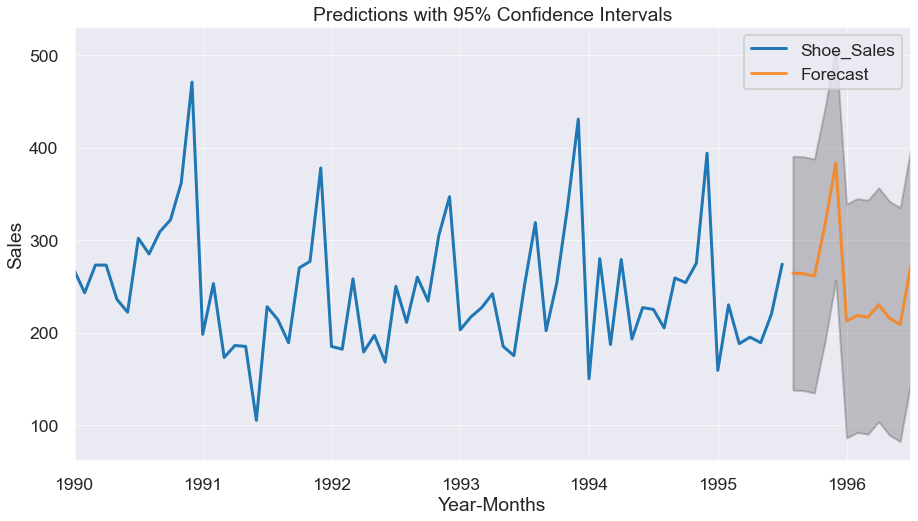

In [126]:
axis = ninetys.plot(label='Actual', figsize=(15,8));
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.8);
axis.fill_between(pred_1_df.index, pred_1_df['lower_ci'], pred_1_df['upper_ci'], color='k', alpha=.2);
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best');
plt.title('Predictions with 95% Confidence Intervals');

### 10. Comment on the model thus built and report your findings and suggest the measures that the company               should be taking for future sales.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.
#### 5

In [127]:
print(model_TES_ADD_df_FULLDATA.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Shoe_Sales   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                         775646.625
Optimized:                         True   AIC                           1589.774
Trend:                         Additive   BIC                           1641.472
Seasonal:                      Additive   AICC                          1593.846
Seasonal Periods:                    12   Date:                 Wed, 25 Jan 2023
Box-Cox:                          False   Time:                         09:07:05
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0883033                alpha                False
smoothing_trend          